In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [2]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [3]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [4]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [5]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [6]:
df['FF_grs'] = pd.cut(df['Req_Finish_Fabrics'],6)

In [7]:
df['Rec_BL_grs']= pd.cut(df['Rec_Beam_length(yds)'],4)

In [8]:
df['SA_grs']= pd.cut(df['Shrink_allow'], 6)

In [9]:
df['FA_grs']= pd.cut(df['Fabric_Allowance'], 6)

In [10]:
df['weft_count']= df['weft_count'].apply(lambda x : str(int(x)))

In [11]:
df['epi']= df['epi'].apply(lambda x: str(x))

In [12]:
df['ppi']= df['ppi'].apply(lambda x: str(x))

In [13]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection,FF_grs,Rec_BL_grs,SA_grs,FA_grs
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80,110,80,285,"(28841.667, 57633.333]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40,110,90,39,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40,110,80,0,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40,130,80,58,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50,140,70,1043,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"


In [14]:
X = df.copy()
y = X.pop('Rejection')

In [15]:
X.dtypes

Req_Finish_Fabrics       float64
Fabric_Allowance         float64
Rec_Beam_length(yds)     float64
Shrink_allow             float64
Req_grey_fabric          float64
Req_beam_length(yds)     float64
warp_count                object
weft_count                object
epi                       object
ppi                       object
FF_grs                  category
Rec_BL_grs              category
SA_grs                  category
FA_grs                  category
dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [18]:
X_train.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.760,23.0,320.512821,380.624009,40,40,110,90,"(-122.75, 28841.667]","(-248.329, 73062.049]","(17.6, 23.4]","(18.0, 24.5]"
2976,100.0,37.2,153.104,15.1,159.235669,171.503965,40,40,100,70,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(31.0, 37.5]"
13508,4750.0,10.2,136.700,17.0,5289.532294,5827.478488,40,40,120,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
5169,2250.0,8.2,2673.852,8.2,2450.980392,2441.398392,50,50,150,96,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"
15152,2150.0,8.2,2679.320,13.4,2342.047930,2472.973059,50,50,130,80,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"


# With OHE without scaling

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [21]:
ohe_cols = [i for i in X_train.columns if len(X_train[i].value_counts())<30]

In [22]:
non_ohe_cols = [j for j in X_train.columns if j not in ohe_cols]

In [23]:
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[ohe_cols]).toarray())

In [24]:
ohe_df.index = X_train.index

In [25]:
X_train_ohe = pd.concat([X_train[non_ohe_cols], ohe_df], axis=1)

In [26]:
ohe_df_test = pd.DataFrame(ohe.transform(X_test[ohe_cols]).toarray())
ohe_df_test.index = X_test.index

In [27]:
X_test_ohe = pd.concat([X_test[non_ohe_cols], ohe_df_test], axis=1)

In [28]:
X_test_ohe.shape, X_train_ohe.shape, X_train.shape

((4402, 86), (17608, 86), (17608, 14))

In [29]:
X_train_ohe.columns= X_train_ohe.columns.astype(str)
X_test_ohe.columns = X_test_ohe.columns.astype(str)

In [30]:
X_all = pd.concat([X_train_ohe, X_test_ohe], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

In [31]:
X_all.shape, y_all.shape

((22010, 86), (22010,))

In [32]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2_score calculation

In [45]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [46]:
r2_dict_df=calculate_r2_score(models, X_train_ohe, y_train, X_test_ohe)

Learning rate set to 0.064417
0:	learn: 156.2126115	total: 3.7ms	remaining: 3.7s
1:	learn: 149.1868118	total: 6.78ms	remaining: 3.38s
2:	learn: 142.8874551	total: 9.52ms	remaining: 3.16s
3:	learn: 136.9245569	total: 12.1ms	remaining: 3s
4:	learn: 131.3350554	total: 14.9ms	remaining: 2.96s
5:	learn: 126.2702406	total: 17.5ms	remaining: 2.9s
6:	learn: 121.6158906	total: 19.9ms	remaining: 2.83s
7:	learn: 117.3398360	total: 22.8ms	remaining: 2.83s
8:	learn: 113.2937166	total: 25.5ms	remaining: 2.81s
9:	learn: 109.4578853	total: 28.2ms	remaining: 2.79s
10:	learn: 106.0016303	total: 31ms	remaining: 2.79s
11:	learn: 102.8107645	total: 33.6ms	remaining: 2.77s
12:	learn: 99.8200483	total: 36.3ms	remaining: 2.76s
13:	learn: 97.1686918	total: 39.1ms	remaining: 2.75s
14:	learn: 94.6058040	total: 41.6ms	remaining: 2.73s
15:	learn: 92.3633826	total: 44.7ms	remaining: 2.75s
16:	learn: 90.2036546	total: 47.5ms	remaining: 2.75s
17:	learn: 88.1986826	total: 50ms	remaining: 2.73s
18:	learn: 86.3802481	to

217:	learn: 52.1590102	total: 591ms	remaining: 2.12s
218:	learn: 52.0165836	total: 594ms	remaining: 2.12s
219:	learn: 51.9622958	total: 596ms	remaining: 2.11s
220:	learn: 51.9271253	total: 599ms	remaining: 2.11s
221:	learn: 51.7935666	total: 601ms	remaining: 2.11s
222:	learn: 51.6573048	total: 604ms	remaining: 2.1s
223:	learn: 51.6289614	total: 606ms	remaining: 2.1s
224:	learn: 51.5924730	total: 608ms	remaining: 2.1s
225:	learn: 51.5602121	total: 611ms	remaining: 2.09s
226:	learn: 51.5429993	total: 613ms	remaining: 2.09s
227:	learn: 51.5171287	total: 616ms	remaining: 2.08s
228:	learn: 51.4982681	total: 618ms	remaining: 2.08s
229:	learn: 51.4467067	total: 621ms	remaining: 2.08s
230:	learn: 51.4036144	total: 623ms	remaining: 2.07s
231:	learn: 51.3648607	total: 625ms	remaining: 2.07s
232:	learn: 51.3408491	total: 628ms	remaining: 2.06s
233:	learn: 51.3111628	total: 630ms	remaining: 2.06s
234:	learn: 51.2690401	total: 632ms	remaining: 2.06s
235:	learn: 51.2561174	total: 635ms	remaining: 2.

375:	learn: 48.1262378	total: 986ms	remaining: 1.64s
376:	learn: 48.1033491	total: 989ms	remaining: 1.63s
377:	learn: 48.0990057	total: 991ms	remaining: 1.63s
378:	learn: 48.0938919	total: 994ms	remaining: 1.63s
379:	learn: 48.0676581	total: 996ms	remaining: 1.63s
380:	learn: 48.0488560	total: 999ms	remaining: 1.62s
381:	learn: 48.0302974	total: 1s	remaining: 1.62s
382:	learn: 48.0133477	total: 1s	remaining: 1.62s
383:	learn: 48.0047800	total: 1.01s	remaining: 1.61s
384:	learn: 47.9757078	total: 1.01s	remaining: 1.61s
385:	learn: 47.9588470	total: 1.01s	remaining: 1.61s
386:	learn: 47.9449393	total: 1.01s	remaining: 1.61s
387:	learn: 47.9364543	total: 1.02s	remaining: 1.6s
388:	learn: 47.8750147	total: 1.02s	remaining: 1.6s
389:	learn: 47.8650453	total: 1.02s	remaining: 1.6s
390:	learn: 47.8486722	total: 1.02s	remaining: 1.59s
391:	learn: 47.8369958	total: 1.03s	remaining: 1.59s
392:	learn: 47.8270802	total: 1.03s	remaining: 1.59s
393:	learn: 47.8137940	total: 1.03s	remaining: 1.59s
39

597:	learn: 45.4458246	total: 1.58s	remaining: 1.06s
598:	learn: 45.4435166	total: 1.58s	remaining: 1.06s
599:	learn: 45.4376309	total: 1.58s	remaining: 1.05s
600:	learn: 45.4308199	total: 1.58s	remaining: 1.05s
601:	learn: 45.4167877	total: 1.59s	remaining: 1.05s
602:	learn: 45.4044166	total: 1.59s	remaining: 1.05s
603:	learn: 45.3993814	total: 1.59s	remaining: 1.04s
604:	learn: 45.3938480	total: 1.59s	remaining: 1.04s
605:	learn: 45.3830437	total: 1.6s	remaining: 1.04s
606:	learn: 45.3604466	total: 1.6s	remaining: 1.04s
607:	learn: 45.3534535	total: 1.6s	remaining: 1.03s
608:	learn: 45.3408308	total: 1.6s	remaining: 1.03s
609:	learn: 45.3351542	total: 1.61s	remaining: 1.03s
610:	learn: 45.3282977	total: 1.61s	remaining: 1.02s
611:	learn: 45.3224213	total: 1.61s	remaining: 1.02s
612:	learn: 45.3194154	total: 1.61s	remaining: 1.02s
613:	learn: 45.3132752	total: 1.62s	remaining: 1.02s
614:	learn: 45.3095584	total: 1.62s	remaining: 1.01s
615:	learn: 45.2879146	total: 1.62s	remaining: 1.0

756:	learn: 44.5208352	total: 1.97s	remaining: 633ms
757:	learn: 44.5136740	total: 1.98s	remaining: 631ms
758:	learn: 44.5116807	total: 1.98s	remaining: 628ms
759:	learn: 44.5092656	total: 1.98s	remaining: 625ms
760:	learn: 44.5031630	total: 1.98s	remaining: 623ms
761:	learn: 44.4965295	total: 1.99s	remaining: 620ms
762:	learn: 44.4847036	total: 1.99s	remaining: 617ms
763:	learn: 44.4732614	total: 1.99s	remaining: 615ms
764:	learn: 44.4695512	total: 1.99s	remaining: 612ms
765:	learn: 44.4671140	total: 2s	remaining: 610ms
766:	learn: 44.4611981	total: 2s	remaining: 607ms
767:	learn: 44.4599262	total: 2s	remaining: 604ms
768:	learn: 44.4577098	total: 2s	remaining: 602ms
769:	learn: 44.4547860	total: 2s	remaining: 599ms
770:	learn: 44.4532903	total: 2.01s	remaining: 596ms
771:	learn: 44.4471600	total: 2.01s	remaining: 594ms
772:	learn: 44.4436883	total: 2.01s	remaining: 591ms
773:	learn: 44.4292964	total: 2.02s	remaining: 588ms
774:	learn: 44.4276565	total: 2.02s	remaining: 586ms
775:	lea

912:	learn: 43.8705463	total: 2.37s	remaining: 226ms
913:	learn: 43.8677470	total: 2.37s	remaining: 223ms
914:	learn: 43.8650052	total: 2.37s	remaining: 221ms
915:	learn: 43.8605999	total: 2.38s	remaining: 218ms
916:	learn: 43.8546622	total: 2.38s	remaining: 215ms
917:	learn: 43.8511771	total: 2.38s	remaining: 213ms
918:	learn: 43.8499255	total: 2.38s	remaining: 210ms
919:	learn: 43.8476053	total: 2.39s	remaining: 208ms
920:	learn: 43.8462584	total: 2.39s	remaining: 205ms
921:	learn: 43.8434410	total: 2.39s	remaining: 202ms
922:	learn: 43.8391758	total: 2.4s	remaining: 200ms
923:	learn: 43.8358662	total: 2.4s	remaining: 197ms
924:	learn: 43.8324001	total: 2.4s	remaining: 195ms
925:	learn: 43.8295859	total: 2.4s	remaining: 192ms
926:	learn: 43.8279269	total: 2.4s	remaining: 189ms
927:	learn: 43.8254244	total: 2.41s	remaining: 187ms
928:	learn: 43.8232988	total: 2.41s	remaining: 184ms
929:	learn: 43.8196621	total: 2.41s	remaining: 182ms
930:	learn: 43.8156495	total: 2.42s	remaining: 179m

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.503e+07, tolerance: 4.724e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.506e+07, tolerance: 4.724e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87379.44200462103, tolerance: 38993.206351898916
  model = c

In [47]:
r2_dict_df

{'light_gbm': 0.9363587440226965,
 'rnf': 0.9549895429166079,
 'cat': 0.9365156371863377,
 'xgboost': 0.9563228303114485,
 'lr': 0.6683133898198519,
 'laso': 0.6350820294628386,
 'elastonet': 0.6350019332824742,
 'elastonet_cv': 0.6323507331424799,
 'ridge': 0.6682113937936972,
 'decision_tree': 0.9560423912016951,
 'knn': 0.9280413941691728,
 'adaboost': 0.8206024274844904,
 'svm': 0.20598312516591788}

In [48]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [50]:
r2_score_df.to_csv('r2_score_dataset_2_ohe_gr_no_sc.csv', index = False)

In [67]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_all, y_all, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 159.6630435	total: 4.15ms	remaining: 4.15s
1:	learn: 152.1065454	total: 7.73ms	remaining: 3.86s
2:	learn: 145.0617359	total: 11ms	remaining: 3.67s
3:	learn: 138.6883385	total: 14.8ms	remaining: 3.67s
4:	learn: 132.8221735	total: 17.9ms	remaining: 3.57s
5:	learn: 127.3212092	total: 20.7ms	remaining: 3.44s
6:	learn: 122.2781217	total: 23.7ms	remaining: 3.37s
7:	learn: 117.4569607	total: 26.5ms	remaining: 3.29s
8:	learn: 113.1567368	total: 29.2ms	remaining: 3.21s
9:	learn: 109.1220560	total: 31.9ms	remaining: 3.15s
10:	learn: 105.4935604	total: 34.9ms	remaining: 3.13s
11:	learn: 102.0118117	total: 37.7ms	remaining: 3.11s
12:	learn: 98.9759005	total: 40.5ms	remaining: 3.07s
13:	learn: 96.0809933	total: 43.3ms	remaining: 3.05s
14:	learn: 93.5791405	total: 46.2ms	remaining: 3.04s
15:	learn: 91.2529008	total: 49.5ms	remaining: 3.04s
16:	learn: 89.0589863	total: 52.7ms	remaining: 3.05s
17:	learn: 87.0114401	total: 55.8ms	remaining: 3.04s
18:	learn: 85.10

213:	learn: 52.4067034	total: 588ms	remaining: 2.16s
214:	learn: 52.3677224	total: 591ms	remaining: 2.16s
215:	learn: 52.3434569	total: 594ms	remaining: 2.15s
216:	learn: 52.3112746	total: 597ms	remaining: 2.15s
217:	learn: 52.2688183	total: 600ms	remaining: 2.15s
218:	learn: 52.2224915	total: 603ms	remaining: 2.15s
219:	learn: 52.1782150	total: 605ms	remaining: 2.15s
220:	learn: 52.1396234	total: 608ms	remaining: 2.14s
221:	learn: 52.0166003	total: 611ms	remaining: 2.14s
222:	learn: 51.9963792	total: 614ms	remaining: 2.14s
223:	learn: 51.9621434	total: 616ms	remaining: 2.13s
224:	learn: 51.8506603	total: 619ms	remaining: 2.13s
225:	learn: 51.8297796	total: 622ms	remaining: 2.13s
226:	learn: 51.7959635	total: 625ms	remaining: 2.13s
227:	learn: 51.7730706	total: 627ms	remaining: 2.12s
228:	learn: 51.7608400	total: 630ms	remaining: 2.12s
229:	learn: 51.7142190	total: 633ms	remaining: 2.12s
230:	learn: 51.6926182	total: 636ms	remaining: 2.12s
231:	learn: 51.6579333	total: 638ms	remaining:

437:	learn: 47.3584009	total: 1.18s	remaining: 1.51s
438:	learn: 47.3526403	total: 1.18s	remaining: 1.51s
439:	learn: 47.3443161	total: 1.19s	remaining: 1.51s
440:	learn: 47.3297986	total: 1.19s	remaining: 1.51s
441:	learn: 47.3240348	total: 1.19s	remaining: 1.5s
442:	learn: 47.3108288	total: 1.19s	remaining: 1.5s
443:	learn: 47.2989125	total: 1.2s	remaining: 1.5s
444:	learn: 47.2901962	total: 1.2s	remaining: 1.49s
445:	learn: 47.2838409	total: 1.2s	remaining: 1.49s
446:	learn: 47.2744832	total: 1.2s	remaining: 1.49s
447:	learn: 47.2691486	total: 1.21s	remaining: 1.49s
448:	learn: 47.2590033	total: 1.21s	remaining: 1.48s
449:	learn: 47.2542245	total: 1.21s	remaining: 1.48s
450:	learn: 47.2510242	total: 1.21s	remaining: 1.48s
451:	learn: 47.2373892	total: 1.22s	remaining: 1.47s
452:	learn: 47.2314984	total: 1.22s	remaining: 1.47s
453:	learn: 47.2258107	total: 1.22s	remaining: 1.47s
454:	learn: 47.2096863	total: 1.22s	remaining: 1.47s
455:	learn: 47.1837279	total: 1.23s	remaining: 1.46s


593:	learn: 45.8872420	total: 1.57s	remaining: 1.08s
594:	learn: 45.8815887	total: 1.58s	remaining: 1.07s
595:	learn: 45.8675306	total: 1.58s	remaining: 1.07s
596:	learn: 45.8612888	total: 1.58s	remaining: 1.07s
597:	learn: 45.8550024	total: 1.58s	remaining: 1.07s
598:	learn: 45.8438937	total: 1.59s	remaining: 1.06s
599:	learn: 45.8373557	total: 1.59s	remaining: 1.06s
600:	learn: 45.8287543	total: 1.59s	remaining: 1.06s
601:	learn: 45.8236995	total: 1.6s	remaining: 1.05s
602:	learn: 45.8172368	total: 1.6s	remaining: 1.05s
603:	learn: 45.8138076	total: 1.6s	remaining: 1.05s
604:	learn: 45.7913155	total: 1.6s	remaining: 1.05s
605:	learn: 45.7768143	total: 1.61s	remaining: 1.04s
606:	learn: 45.7736056	total: 1.61s	remaining: 1.04s
607:	learn: 45.7674082	total: 1.61s	remaining: 1.04s
608:	learn: 45.7621560	total: 1.61s	remaining: 1.03s
609:	learn: 45.7541991	total: 1.61s	remaining: 1.03s
610:	learn: 45.7480698	total: 1.62s	remaining: 1.03s
611:	learn: 45.7449050	total: 1.62s	remaining: 1.0

824:	learn: 44.6238896	total: 2.17s	remaining: 461ms
825:	learn: 44.6204518	total: 2.17s	remaining: 458ms
826:	learn: 44.6154074	total: 2.18s	remaining: 455ms
827:	learn: 44.6115054	total: 2.18s	remaining: 453ms
828:	learn: 44.6077127	total: 2.18s	remaining: 450ms
829:	learn: 44.6041441	total: 2.18s	remaining: 447ms
830:	learn: 44.5994266	total: 2.19s	remaining: 445ms
831:	learn: 44.5979931	total: 2.19s	remaining: 442ms
832:	learn: 44.5908640	total: 2.19s	remaining: 439ms
833:	learn: 44.5874763	total: 2.19s	remaining: 437ms
834:	learn: 44.5832395	total: 2.2s	remaining: 434ms
835:	learn: 44.5794372	total: 2.2s	remaining: 432ms
836:	learn: 44.5777070	total: 2.2s	remaining: 429ms
837:	learn: 44.5751217	total: 2.2s	remaining: 426ms
838:	learn: 44.5722753	total: 2.21s	remaining: 424ms
839:	learn: 44.5708464	total: 2.21s	remaining: 421ms
840:	learn: 44.5647399	total: 2.21s	remaining: 418ms
841:	learn: 44.5613579	total: 2.21s	remaining: 416ms
842:	learn: 44.5590421	total: 2.22s	remaining: 413

981:	learn: 44.1403987	total: 2.57s	remaining: 47ms
982:	learn: 44.1391803	total: 2.57s	remaining: 44.4ms
983:	learn: 44.1326427	total: 2.57s	remaining: 41.8ms
984:	learn: 44.1308563	total: 2.57s	remaining: 39.2ms
985:	learn: 44.1299897	total: 2.58s	remaining: 36.6ms
986:	learn: 44.1291611	total: 2.58s	remaining: 34ms
987:	learn: 44.1274110	total: 2.58s	remaining: 31.3ms
988:	learn: 44.1221260	total: 2.58s	remaining: 28.7ms
989:	learn: 44.1194090	total: 2.58s	remaining: 26.1ms
990:	learn: 44.1171602	total: 2.59s	remaining: 23.5ms
991:	learn: 44.1155765	total: 2.59s	remaining: 20.9ms
992:	learn: 44.1124014	total: 2.59s	remaining: 18.3ms
993:	learn: 44.1109579	total: 2.6s	remaining: 15.7ms
994:	learn: 44.1081441	total: 2.6s	remaining: 13.1ms
995:	learn: 44.1070203	total: 2.6s	remaining: 10.4ms
996:	learn: 44.1036886	total: 2.6s	remaining: 7.83ms
997:	learn: 44.0996074	total: 2.61s	remaining: 5.22ms
998:	learn: 44.0972669	total: 2.61s	remaining: 2.61ms
999:	learn: 44.0951481	total: 2.61s	

152:	learn: 56.4160437	total: 390ms	remaining: 2.16s
153:	learn: 56.3828432	total: 392ms	remaining: 2.15s
154:	learn: 56.1363506	total: 395ms	remaining: 2.15s
155:	learn: 55.8846617	total: 397ms	remaining: 2.15s
156:	learn: 55.8306221	total: 399ms	remaining: 2.14s
157:	learn: 55.7828317	total: 402ms	remaining: 2.14s
158:	learn: 55.7525105	total: 404ms	remaining: 2.14s
159:	learn: 55.6571015	total: 407ms	remaining: 2.14s
160:	learn: 55.6005178	total: 409ms	remaining: 2.13s
161:	learn: 55.5653219	total: 412ms	remaining: 2.13s
162:	learn: 55.5230863	total: 414ms	remaining: 2.13s
163:	learn: 55.4502665	total: 417ms	remaining: 2.12s
164:	learn: 55.3978144	total: 419ms	remaining: 2.12s
165:	learn: 55.3563587	total: 422ms	remaining: 2.12s
166:	learn: 55.2705254	total: 425ms	remaining: 2.12s
167:	learn: 55.2456082	total: 427ms	remaining: 2.12s
168:	learn: 55.1847722	total: 430ms	remaining: 2.11s
169:	learn: 54.9790829	total: 433ms	remaining: 2.11s
170:	learn: 54.7984968	total: 436ms	remaining:

385:	learn: 48.2889993	total: 983ms	remaining: 1.56s
386:	learn: 48.2757610	total: 985ms	remaining: 1.56s
387:	learn: 48.2574697	total: 988ms	remaining: 1.56s
388:	learn: 48.2383152	total: 990ms	remaining: 1.55s
389:	learn: 48.2221302	total: 993ms	remaining: 1.55s
390:	learn: 48.2160975	total: 995ms	remaining: 1.55s
391:	learn: 48.1556208	total: 998ms	remaining: 1.55s
392:	learn: 48.1395688	total: 1s	remaining: 1.54s
393:	learn: 48.1300790	total: 1s	remaining: 1.54s
394:	learn: 48.1180719	total: 1s	remaining: 1.54s
395:	learn: 48.0837691	total: 1.01s	remaining: 1.54s
396:	learn: 48.0764057	total: 1.01s	remaining: 1.53s
397:	learn: 48.0619801	total: 1.01s	remaining: 1.53s
398:	learn: 48.0525435	total: 1.01s	remaining: 1.53s
399:	learn: 48.0401706	total: 1.02s	remaining: 1.52s
400:	learn: 48.0338385	total: 1.02s	remaining: 1.52s
401:	learn: 48.0118398	total: 1.02s	remaining: 1.52s
402:	learn: 47.9935285	total: 1.02s	remaining: 1.52s
403:	learn: 47.9783509	total: 1.03s	remaining: 1.51s
40

542:	learn: 46.3102352	total: 1.38s	remaining: 1.16s
543:	learn: 46.3050914	total: 1.38s	remaining: 1.16s
544:	learn: 46.2981489	total: 1.38s	remaining: 1.15s
545:	learn: 46.2814102	total: 1.38s	remaining: 1.15s
546:	learn: 46.2719700	total: 1.39s	remaining: 1.15s
547:	learn: 46.2634039	total: 1.39s	remaining: 1.15s
548:	learn: 46.2588702	total: 1.39s	remaining: 1.14s
549:	learn: 46.2533374	total: 1.39s	remaining: 1.14s
550:	learn: 46.2448804	total: 1.4s	remaining: 1.14s
551:	learn: 46.2363453	total: 1.4s	remaining: 1.14s
552:	learn: 46.2227842	total: 1.4s	remaining: 1.13s
553:	learn: 46.2081778	total: 1.4s	remaining: 1.13s
554:	learn: 46.2041196	total: 1.41s	remaining: 1.13s
555:	learn: 46.1878398	total: 1.41s	remaining: 1.13s
556:	learn: 46.1795789	total: 1.41s	remaining: 1.12s
557:	learn: 46.1721000	total: 1.41s	remaining: 1.12s
558:	learn: 46.1633740	total: 1.42s	remaining: 1.12s
559:	learn: 46.1548951	total: 1.42s	remaining: 1.11s
560:	learn: 46.1442051	total: 1.42s	remaining: 1.1

698:	learn: 45.2123841	total: 1.77s	remaining: 764ms
699:	learn: 45.2074728	total: 1.78s	remaining: 762ms
700:	learn: 45.2046266	total: 1.78s	remaining: 760ms
701:	learn: 45.1980910	total: 1.78s	remaining: 757ms
702:	learn: 45.1959740	total: 1.79s	remaining: 755ms
703:	learn: 45.1863584	total: 1.79s	remaining: 752ms
704:	learn: 45.1777589	total: 1.79s	remaining: 750ms
705:	learn: 45.1702585	total: 1.79s	remaining: 747ms
706:	learn: 45.1654325	total: 1.8s	remaining: 745ms
707:	learn: 45.1582820	total: 1.8s	remaining: 742ms
708:	learn: 45.1546651	total: 1.8s	remaining: 740ms
709:	learn: 45.1532714	total: 1.8s	remaining: 737ms
710:	learn: 45.1513192	total: 1.81s	remaining: 735ms
711:	learn: 45.1449409	total: 1.81s	remaining: 732ms
712:	learn: 45.1374041	total: 1.81s	remaining: 730ms
713:	learn: 45.1319002	total: 1.81s	remaining: 727ms
714:	learn: 45.1230607	total: 1.82s	remaining: 725ms
715:	learn: 45.1181524	total: 1.82s	remaining: 722ms
716:	learn: 45.1114888	total: 1.82s	remaining: 720

930:	learn: 44.3110991	total: 2.37s	remaining: 176ms
931:	learn: 44.3086053	total: 2.37s	remaining: 173ms
932:	learn: 44.3042056	total: 2.37s	remaining: 170ms
933:	learn: 44.3011091	total: 2.38s	remaining: 168ms
934:	learn: 44.2993696	total: 2.38s	remaining: 165ms
935:	learn: 44.2953695	total: 2.38s	remaining: 163ms
936:	learn: 44.2934444	total: 2.38s	remaining: 160ms
937:	learn: 44.2909680	total: 2.39s	remaining: 158ms
938:	learn: 44.2871831	total: 2.39s	remaining: 155ms
939:	learn: 44.2850369	total: 2.39s	remaining: 153ms
940:	learn: 44.2834299	total: 2.39s	remaining: 150ms
941:	learn: 44.2792665	total: 2.4s	remaining: 148ms
942:	learn: 44.2763821	total: 2.4s	remaining: 145ms
943:	learn: 44.2753610	total: 2.4s	remaining: 142ms
944:	learn: 44.2715547	total: 2.4s	remaining: 140ms
945:	learn: 44.2693540	total: 2.41s	remaining: 137ms
946:	learn: 44.2660285	total: 2.41s	remaining: 135ms
947:	learn: 44.2646724	total: 2.41s	remaining: 132ms
948:	learn: 44.2630528	total: 2.41s	remaining: 130

131:	learn: 56.7728367	total: 384ms	remaining: 2.53s
132:	learn: 56.7158485	total: 387ms	remaining: 2.52s
133:	learn: 56.6186370	total: 389ms	remaining: 2.52s
134:	learn: 56.5924379	total: 392ms	remaining: 2.51s
135:	learn: 56.5040750	total: 395ms	remaining: 2.51s
136:	learn: 56.3997149	total: 397ms	remaining: 2.5s
137:	learn: 56.3703841	total: 400ms	remaining: 2.5s
138:	learn: 56.3342417	total: 402ms	remaining: 2.49s
139:	learn: 56.2724965	total: 405ms	remaining: 2.49s
140:	learn: 56.1907003	total: 407ms	remaining: 2.48s
141:	learn: 56.1652384	total: 410ms	remaining: 2.48s
142:	learn: 56.0652078	total: 412ms	remaining: 2.47s
143:	learn: 55.9311306	total: 415ms	remaining: 2.46s
144:	learn: 55.8214754	total: 417ms	remaining: 2.46s
145:	learn: 55.7425819	total: 420ms	remaining: 2.45s
146:	learn: 55.6635695	total: 422ms	remaining: 2.45s
147:	learn: 55.6056881	total: 425ms	remaining: 2.44s
148:	learn: 55.5934865	total: 427ms	remaining: 2.44s
149:	learn: 55.5190304	total: 429ms	remaining: 2

290:	learn: 48.3234225	total: 780ms	remaining: 1.9s
291:	learn: 48.3109887	total: 783ms	remaining: 1.9s
292:	learn: 48.2820986	total: 785ms	remaining: 1.89s
293:	learn: 48.2574180	total: 788ms	remaining: 1.89s
294:	learn: 48.2258026	total: 790ms	remaining: 1.89s
295:	learn: 48.1588946	total: 793ms	remaining: 1.89s
296:	learn: 48.0756933	total: 795ms	remaining: 1.88s
297:	learn: 48.0563334	total: 798ms	remaining: 1.88s
298:	learn: 48.0333402	total: 800ms	remaining: 1.88s
299:	learn: 48.0106109	total: 803ms	remaining: 1.87s
300:	learn: 47.9862910	total: 805ms	remaining: 1.87s
301:	learn: 47.9648635	total: 808ms	remaining: 1.87s
302:	learn: 47.9428172	total: 810ms	remaining: 1.86s
303:	learn: 47.9147864	total: 813ms	remaining: 1.86s
304:	learn: 47.8994931	total: 815ms	remaining: 1.86s
305:	learn: 47.8804157	total: 818ms	remaining: 1.85s
306:	learn: 47.8556879	total: 820ms	remaining: 1.85s
307:	learn: 47.8295799	total: 823ms	remaining: 1.85s
308:	learn: 47.8161775	total: 825ms	remaining: 1

448:	learn: 45.5135397	total: 1.18s	remaining: 1.45s
449:	learn: 45.5060605	total: 1.18s	remaining: 1.44s
450:	learn: 45.4922115	total: 1.18s	remaining: 1.44s
451:	learn: 45.4830894	total: 1.19s	remaining: 1.44s
452:	learn: 45.4706136	total: 1.19s	remaining: 1.43s
453:	learn: 45.4629720	total: 1.19s	remaining: 1.43s
454:	learn: 45.4555371	total: 1.19s	remaining: 1.43s
455:	learn: 45.4452896	total: 1.2s	remaining: 1.43s
456:	learn: 45.4403729	total: 1.2s	remaining: 1.42s
457:	learn: 45.4351314	total: 1.2s	remaining: 1.42s
458:	learn: 45.4284528	total: 1.2s	remaining: 1.42s
459:	learn: 45.4201719	total: 1.21s	remaining: 1.42s
460:	learn: 45.4049461	total: 1.21s	remaining: 1.41s
461:	learn: 45.3940270	total: 1.21s	remaining: 1.41s
462:	learn: 45.3828088	total: 1.21s	remaining: 1.41s
463:	learn: 45.3753799	total: 1.22s	remaining: 1.4s
464:	learn: 45.3674431	total: 1.22s	remaining: 1.4s
465:	learn: 45.3540349	total: 1.22s	remaining: 1.4s
466:	learn: 45.3461302	total: 1.22s	remaining: 1.4s
4

679:	learn: 43.4081366	total: 1.77s	remaining: 834ms
680:	learn: 43.4044591	total: 1.77s	remaining: 832ms
681:	learn: 43.4020196	total: 1.78s	remaining: 829ms
682:	learn: 43.3996891	total: 1.78s	remaining: 826ms
683:	learn: 43.3975023	total: 1.78s	remaining: 824ms
684:	learn: 43.3934985	total: 1.78s	remaining: 821ms
685:	learn: 43.3910742	total: 1.79s	remaining: 818ms
686:	learn: 43.3772468	total: 1.79s	remaining: 816ms
687:	learn: 43.3728572	total: 1.79s	remaining: 813ms
688:	learn: 43.3690061	total: 1.79s	remaining: 810ms
689:	learn: 43.3673791	total: 1.8s	remaining: 808ms
690:	learn: 43.3552210	total: 1.8s	remaining: 805ms
691:	learn: 43.3478245	total: 1.8s	remaining: 803ms
692:	learn: 43.3454122	total: 1.81s	remaining: 800ms
693:	learn: 43.3353668	total: 1.81s	remaining: 798ms
694:	learn: 43.3275395	total: 1.81s	remaining: 795ms
695:	learn: 43.3239635	total: 1.81s	remaining: 792ms
696:	learn: 43.3214398	total: 1.82s	remaining: 790ms
697:	learn: 43.3182225	total: 1.82s	remaining: 78

908:	learn: 42.4350237	total: 2.36s	remaining: 236ms
909:	learn: 42.4312619	total: 2.37s	remaining: 234ms
910:	learn: 42.4297399	total: 2.37s	remaining: 231ms
911:	learn: 42.4198421	total: 2.37s	remaining: 229ms
912:	learn: 42.4176507	total: 2.37s	remaining: 226ms
913:	learn: 42.4092672	total: 2.38s	remaining: 224ms
914:	learn: 42.4056721	total: 2.38s	remaining: 221ms
915:	learn: 42.4029966	total: 2.38s	remaining: 218ms
916:	learn: 42.3982382	total: 2.38s	remaining: 216ms
917:	learn: 42.3946974	total: 2.38s	remaining: 213ms
918:	learn: 42.3933235	total: 2.39s	remaining: 210ms
919:	learn: 42.3915637	total: 2.39s	remaining: 208ms
920:	learn: 42.3860608	total: 2.39s	remaining: 205ms
921:	learn: 42.3785029	total: 2.4s	remaining: 203ms
922:	learn: 42.3745012	total: 2.4s	remaining: 200ms
923:	learn: 42.3703769	total: 2.4s	remaining: 197ms
924:	learn: 42.3661556	total: 2.4s	remaining: 195ms
925:	learn: 42.3642041	total: 2.41s	remaining: 192ms
926:	learn: 42.3610830	total: 2.41s	remaining: 190

72:	learn: 61.5134270	total: 197ms	remaining: 2.5s
73:	learn: 61.4304033	total: 200ms	remaining: 2.51s
74:	learn: 61.3602627	total: 203ms	remaining: 2.5s
75:	learn: 61.2580877	total: 207ms	remaining: 2.52s
76:	learn: 61.1885867	total: 212ms	remaining: 2.54s
77:	learn: 61.1381490	total: 216ms	remaining: 2.55s
78:	learn: 61.0648529	total: 220ms	remaining: 2.56s
79:	learn: 61.0042762	total: 223ms	remaining: 2.57s
80:	learn: 60.9367573	total: 227ms	remaining: 2.57s
81:	learn: 60.7459824	total: 230ms	remaining: 2.58s
82:	learn: 60.6346101	total: 235ms	remaining: 2.6s
83:	learn: 60.5281167	total: 239ms	remaining: 2.6s
84:	learn: 60.4335600	total: 243ms	remaining: 2.61s
85:	learn: 60.3887068	total: 246ms	remaining: 2.62s
86:	learn: 60.1146021	total: 250ms	remaining: 2.62s
87:	learn: 60.0574015	total: 254ms	remaining: 2.63s
88:	learn: 59.9164643	total: 259ms	remaining: 2.65s
89:	learn: 59.8425173	total: 263ms	remaining: 2.66s
90:	learn: 59.7696374	total: 267ms	remaining: 2.66s
91:	learn: 59.73

294:	learn: 49.3368124	total: 907ms	remaining: 2.17s
295:	learn: 49.3284402	total: 909ms	remaining: 2.16s
296:	learn: 49.3054488	total: 912ms	remaining: 2.16s
297:	learn: 49.2829362	total: 914ms	remaining: 2.15s
298:	learn: 49.2642905	total: 916ms	remaining: 2.15s
299:	learn: 49.2394545	total: 919ms	remaining: 2.14s
300:	learn: 49.2270515	total: 922ms	remaining: 2.14s
301:	learn: 49.2137040	total: 925ms	remaining: 2.14s
302:	learn: 49.2002900	total: 927ms	remaining: 2.13s
303:	learn: 49.1813206	total: 930ms	remaining: 2.13s
304:	learn: 49.1476038	total: 932ms	remaining: 2.12s
305:	learn: 49.1357260	total: 935ms	remaining: 2.12s
306:	learn: 49.1283332	total: 938ms	remaining: 2.12s
307:	learn: 49.1186018	total: 940ms	remaining: 2.11s
308:	learn: 49.0950345	total: 943ms	remaining: 2.11s
309:	learn: 49.0578323	total: 945ms	remaining: 2.1s
310:	learn: 49.0401045	total: 948ms	remaining: 2.1s
311:	learn: 49.0183758	total: 950ms	remaining: 2.1s
312:	learn: 49.0042795	total: 953ms	remaining: 2.

450:	learn: 46.9968014	total: 1.3s	remaining: 1.58s
451:	learn: 46.9816065	total: 1.3s	remaining: 1.58s
452:	learn: 46.9673410	total: 1.31s	remaining: 1.58s
453:	learn: 46.9609300	total: 1.31s	remaining: 1.57s
454:	learn: 46.9496349	total: 1.31s	remaining: 1.57s
455:	learn: 46.9405634	total: 1.31s	remaining: 1.57s
456:	learn: 46.9170253	total: 1.32s	remaining: 1.56s
457:	learn: 46.9092912	total: 1.32s	remaining: 1.56s
458:	learn: 46.9056357	total: 1.32s	remaining: 1.56s
459:	learn: 46.8992043	total: 1.32s	remaining: 1.56s
460:	learn: 46.8940033	total: 1.33s	remaining: 1.55s
461:	learn: 46.8888185	total: 1.33s	remaining: 1.55s
462:	learn: 46.8713846	total: 1.33s	remaining: 1.55s
463:	learn: 46.8597155	total: 1.34s	remaining: 1.54s
464:	learn: 46.8461058	total: 1.34s	remaining: 1.54s
465:	learn: 46.8328100	total: 1.34s	remaining: 1.54s
466:	learn: 46.8177702	total: 1.34s	remaining: 1.53s
467:	learn: 46.8079563	total: 1.35s	remaining: 1.53s
468:	learn: 46.8024991	total: 1.35s	remaining: 1

681:	learn: 45.0574524	total: 1.9s	remaining: 885ms
682:	learn: 45.0535024	total: 1.9s	remaining: 882ms
683:	learn: 45.0496539	total: 1.9s	remaining: 879ms
684:	learn: 45.0430615	total: 1.9s	remaining: 876ms
685:	learn: 45.0364859	total: 1.91s	remaining: 873ms
686:	learn: 45.0342289	total: 1.91s	remaining: 870ms
687:	learn: 45.0283500	total: 1.91s	remaining: 868ms
688:	learn: 45.0211156	total: 1.92s	remaining: 865ms
689:	learn: 45.0142443	total: 1.92s	remaining: 862ms
690:	learn: 44.9981094	total: 1.92s	remaining: 859ms
691:	learn: 44.9915754	total: 1.92s	remaining: 856ms
692:	learn: 44.9854490	total: 1.93s	remaining: 853ms
693:	learn: 44.9795924	total: 1.93s	remaining: 850ms
694:	learn: 44.9755486	total: 1.93s	remaining: 847ms
695:	learn: 44.9719822	total: 1.93s	remaining: 845ms
696:	learn: 44.9691279	total: 1.94s	remaining: 842ms
697:	learn: 44.9631745	total: 1.94s	remaining: 839ms
698:	learn: 44.9592448	total: 1.94s	remaining: 836ms
699:	learn: 44.9546642	total: 1.94s	remaining: 833

912:	learn: 44.0637928	total: 2.49s	remaining: 237ms
913:	learn: 44.0615774	total: 2.49s	remaining: 235ms
914:	learn: 44.0578316	total: 2.5s	remaining: 232ms
915:	learn: 44.0558128	total: 2.5s	remaining: 229ms
916:	learn: 44.0511005	total: 2.5s	remaining: 226ms
917:	learn: 44.0499305	total: 2.5s	remaining: 224ms
918:	learn: 44.0455474	total: 2.51s	remaining: 221ms
919:	learn: 44.0405390	total: 2.51s	remaining: 218ms
920:	learn: 44.0398045	total: 2.51s	remaining: 215ms
921:	learn: 44.0374095	total: 2.51s	remaining: 213ms
922:	learn: 44.0337092	total: 2.52s	remaining: 210ms
923:	learn: 44.0323834	total: 2.52s	remaining: 207ms
924:	learn: 44.0303541	total: 2.52s	remaining: 204ms
925:	learn: 44.0294181	total: 2.52s	remaining: 202ms
926:	learn: 44.0281766	total: 2.53s	remaining: 199ms
927:	learn: 44.0264126	total: 2.53s	remaining: 196ms
928:	learn: 44.0254014	total: 2.53s	remaining: 193ms
929:	learn: 44.0238937	total: 2.53s	remaining: 191ms
930:	learn: 44.0193263	total: 2.54s	remaining: 188

73:	learn: 62.7313647	total: 194ms	remaining: 2.43s
74:	learn: 62.6798715	total: 197ms	remaining: 2.42s
75:	learn: 62.6403135	total: 199ms	remaining: 2.42s
76:	learn: 62.5596957	total: 202ms	remaining: 2.42s
77:	learn: 62.4802775	total: 204ms	remaining: 2.41s
78:	learn: 62.4020221	total: 207ms	remaining: 2.41s
79:	learn: 62.3211587	total: 209ms	remaining: 2.41s
80:	learn: 62.2538899	total: 212ms	remaining: 2.4s
81:	learn: 62.2191408	total: 214ms	remaining: 2.4s
82:	learn: 62.1225584	total: 217ms	remaining: 2.39s
83:	learn: 62.0272234	total: 219ms	remaining: 2.39s
84:	learn: 61.9435854	total: 222ms	remaining: 2.39s
85:	learn: 61.8699854	total: 224ms	remaining: 2.38s
86:	learn: 61.5059094	total: 227ms	remaining: 2.38s
87:	learn: 61.4597577	total: 229ms	remaining: 2.38s
88:	learn: 61.3339423	total: 232ms	remaining: 2.37s
89:	learn: 61.1940203	total: 234ms	remaining: 2.37s
90:	learn: 61.1208901	total: 237ms	remaining: 2.36s
91:	learn: 61.0291840	total: 239ms	remaining: 2.36s
92:	learn: 60.

303:	learn: 49.6949863	total: 786ms	remaining: 1.8s
304:	learn: 49.6823987	total: 789ms	remaining: 1.8s
305:	learn: 49.6531105	total: 791ms	remaining: 1.79s
306:	learn: 49.6336578	total: 794ms	remaining: 1.79s
307:	learn: 49.6024268	total: 796ms	remaining: 1.79s
308:	learn: 49.5762183	total: 799ms	remaining: 1.79s
309:	learn: 49.5642602	total: 801ms	remaining: 1.78s
310:	learn: 49.5576879	total: 804ms	remaining: 1.78s
311:	learn: 49.5033997	total: 806ms	remaining: 1.78s
312:	learn: 49.4989930	total: 809ms	remaining: 1.77s
313:	learn: 49.4799052	total: 811ms	remaining: 1.77s
314:	learn: 49.4440743	total: 814ms	remaining: 1.77s
315:	learn: 49.4192756	total: 816ms	remaining: 1.77s
316:	learn: 49.4037118	total: 819ms	remaining: 1.76s
317:	learn: 49.3975372	total: 821ms	remaining: 1.76s
318:	learn: 49.3732266	total: 824ms	remaining: 1.76s
319:	learn: 49.3618559	total: 827ms	remaining: 1.76s
320:	learn: 49.3490601	total: 829ms	remaining: 1.75s
321:	learn: 49.3294103	total: 832ms	remaining: 1

533:	learn: 46.6344184	total: 1.38s	remaining: 1.2s
534:	learn: 46.6209234	total: 1.38s	remaining: 1.2s
535:	learn: 46.6186658	total: 1.39s	remaining: 1.2s
536:	learn: 46.6083695	total: 1.39s	remaining: 1.2s
537:	learn: 46.6027337	total: 1.39s	remaining: 1.19s
538:	learn: 46.5924483	total: 1.39s	remaining: 1.19s
539:	learn: 46.5814359	total: 1.4s	remaining: 1.19s
540:	learn: 46.5694589	total: 1.4s	remaining: 1.19s
541:	learn: 46.5620407	total: 1.4s	remaining: 1.18s
542:	learn: 46.5568590	total: 1.4s	remaining: 1.18s
543:	learn: 46.5478885	total: 1.41s	remaining: 1.18s
544:	learn: 46.5358316	total: 1.41s	remaining: 1.18s
545:	learn: 46.5216169	total: 1.41s	remaining: 1.17s
546:	learn: 46.5169484	total: 1.41s	remaining: 1.17s
547:	learn: 46.5042361	total: 1.42s	remaining: 1.17s
548:	learn: 46.4957945	total: 1.42s	remaining: 1.17s
549:	learn: 46.4918229	total: 1.42s	remaining: 1.16s
550:	learn: 46.4868650	total: 1.43s	remaining: 1.16s
551:	learn: 46.4755514	total: 1.43s	remaining: 1.16s
5

760:	learn: 45.2747615	total: 1.97s	remaining: 619ms
761:	learn: 45.2702585	total: 1.97s	remaining: 617ms
762:	learn: 45.2671806	total: 1.98s	remaining: 614ms
763:	learn: 45.2626787	total: 1.98s	remaining: 612ms
764:	learn: 45.2578581	total: 1.98s	remaining: 609ms
765:	learn: 45.2519792	total: 1.98s	remaining: 606ms
766:	learn: 45.2458790	total: 1.99s	remaining: 604ms
767:	learn: 45.2382023	total: 1.99s	remaining: 601ms
768:	learn: 45.2337326	total: 1.99s	remaining: 599ms
769:	learn: 45.2291194	total: 2s	remaining: 596ms
770:	learn: 45.2261590	total: 2s	remaining: 593ms
771:	learn: 45.2216701	total: 2s	remaining: 591ms
772:	learn: 45.2173349	total: 2s	remaining: 588ms
773:	learn: 45.2157428	total: 2s	remaining: 586ms
774:	learn: 45.2120668	total: 2.01s	remaining: 583ms
775:	learn: 45.2096090	total: 2.01s	remaining: 580ms
776:	learn: 45.2063601	total: 2.01s	remaining: 578ms
777:	learn: 45.2009735	total: 2.02s	remaining: 575ms
778:	learn: 45.1959138	total: 2.02s	remaining: 573ms
779:	lea

972:	learn: 44.5958412	total: 2.57s	remaining: 71.4ms
973:	learn: 44.5946798	total: 2.58s	remaining: 68.8ms
974:	learn: 44.5935736	total: 2.58s	remaining: 66.2ms
975:	learn: 44.5926421	total: 2.58s	remaining: 63.6ms
976:	learn: 44.5908600	total: 2.59s	remaining: 60.9ms
977:	learn: 44.5863827	total: 2.59s	remaining: 58.3ms
978:	learn: 44.5843264	total: 2.59s	remaining: 55.6ms
979:	learn: 44.5832131	total: 2.6s	remaining: 53ms
980:	learn: 44.5817039	total: 2.6s	remaining: 50.4ms
981:	learn: 44.5809423	total: 2.6s	remaining: 47.7ms
982:	learn: 44.5769019	total: 2.61s	remaining: 45.1ms
983:	learn: 44.5755887	total: 2.61s	remaining: 42.4ms
984:	learn: 44.5734456	total: 2.61s	remaining: 39.8ms
985:	learn: 44.5692131	total: 2.62s	remaining: 37.1ms
986:	learn: 44.5685289	total: 2.62s	remaining: 34.5ms
987:	learn: 44.5658150	total: 2.62s	remaining: 31.8ms
988:	learn: 44.5648432	total: 2.62s	remaining: 29.2ms
989:	learn: 44.5630056	total: 2.63s	remaining: 26.5ms
990:	learn: 44.5579033	total: 2.6

140:	learn: 56.7603433	total: 381ms	remaining: 2.32s
141:	learn: 56.7124057	total: 385ms	remaining: 2.33s
142:	learn: 56.6903736	total: 388ms	remaining: 2.32s
143:	learn: 56.6037711	total: 390ms	remaining: 2.32s
144:	learn: 56.5236362	total: 393ms	remaining: 2.31s
145:	learn: 56.4997688	total: 395ms	remaining: 2.31s
146:	learn: 56.4380459	total: 398ms	remaining: 2.31s
147:	learn: 56.1675963	total: 401ms	remaining: 2.31s
148:	learn: 56.1235911	total: 404ms	remaining: 2.3s
149:	learn: 56.0895129	total: 406ms	remaining: 2.3s
150:	learn: 56.0047406	total: 409ms	remaining: 2.3s
151:	learn: 55.9904965	total: 411ms	remaining: 2.29s
152:	learn: 55.9507828	total: 414ms	remaining: 2.29s
153:	learn: 55.9201234	total: 417ms	remaining: 2.29s
154:	learn: 55.8840162	total: 419ms	remaining: 2.29s
155:	learn: 55.8008845	total: 422ms	remaining: 2.28s
156:	learn: 55.7745539	total: 425ms	remaining: 2.28s
157:	learn: 55.7304338	total: 427ms	remaining: 2.28s
158:	learn: 55.6842818	total: 430ms	remaining: 2.

360:	learn: 48.2407311	total: 975ms	remaining: 1.73s
361:	learn: 48.2190821	total: 978ms	remaining: 1.72s
362:	learn: 48.2017225	total: 980ms	remaining: 1.72s
363:	learn: 48.1865383	total: 983ms	remaining: 1.72s
364:	learn: 48.1701369	total: 986ms	remaining: 1.72s
365:	learn: 48.1566618	total: 989ms	remaining: 1.71s
366:	learn: 48.1471566	total: 991ms	remaining: 1.71s
367:	learn: 48.1357154	total: 994ms	remaining: 1.71s
368:	learn: 48.1259584	total: 996ms	remaining: 1.7s
369:	learn: 48.1132809	total: 999ms	remaining: 1.7s
370:	learn: 48.1045073	total: 1s	remaining: 1.7s
371:	learn: 48.0961744	total: 1s	remaining: 1.7s
372:	learn: 48.0759737	total: 1.01s	remaining: 1.69s
373:	learn: 48.0625418	total: 1.01s	remaining: 1.69s
374:	learn: 48.0562798	total: 1.01s	remaining: 1.69s
375:	learn: 48.0434479	total: 1.01s	remaining: 1.69s
376:	learn: 48.0323259	total: 1.02s	remaining: 1.68s
377:	learn: 48.0166772	total: 1.02s	remaining: 1.68s
378:	learn: 47.9982085	total: 1.02s	remaining: 1.68s
379

578:	learn: 45.7032955	total: 1.57s	remaining: 1.14s
579:	learn: 45.6933871	total: 1.57s	remaining: 1.14s
580:	learn: 45.6865247	total: 1.57s	remaining: 1.13s
581:	learn: 45.6799734	total: 1.57s	remaining: 1.13s
582:	learn: 45.6735990	total: 1.58s	remaining: 1.13s
583:	learn: 45.6712821	total: 1.58s	remaining: 1.13s
584:	learn: 45.6601236	total: 1.58s	remaining: 1.12s
585:	learn: 45.6554917	total: 1.59s	remaining: 1.12s
586:	learn: 45.6504986	total: 1.59s	remaining: 1.12s
587:	learn: 45.6426413	total: 1.59s	remaining: 1.11s
588:	learn: 45.6398573	total: 1.59s	remaining: 1.11s
589:	learn: 45.6357283	total: 1.6s	remaining: 1.11s
590:	learn: 45.6330394	total: 1.6s	remaining: 1.11s
591:	learn: 45.6286629	total: 1.6s	remaining: 1.1s
592:	learn: 45.6205105	total: 1.6s	remaining: 1.1s
593:	learn: 45.6114556	total: 1.61s	remaining: 1.1s
594:	learn: 45.6034247	total: 1.61s	remaining: 1.09s
595:	learn: 45.5932756	total: 1.61s	remaining: 1.09s
596:	learn: 45.5796582	total: 1.61s	remaining: 1.09s


798:	learn: 44.4201317	total: 2.16s	remaining: 543ms
799:	learn: 44.4153650	total: 2.16s	remaining: 541ms
800:	learn: 44.4129684	total: 2.17s	remaining: 538ms
801:	learn: 44.4108136	total: 2.17s	remaining: 535ms
802:	learn: 44.4089029	total: 2.17s	remaining: 533ms
803:	learn: 44.4018418	total: 2.17s	remaining: 530ms
804:	learn: 44.3960985	total: 2.18s	remaining: 527ms
805:	learn: 44.3918062	total: 2.18s	remaining: 525ms
806:	learn: 44.3903431	total: 2.18s	remaining: 522ms
807:	learn: 44.3868968	total: 2.19s	remaining: 519ms
808:	learn: 44.3839714	total: 2.19s	remaining: 516ms
809:	learn: 44.3790076	total: 2.19s	remaining: 514ms
810:	learn: 44.3667200	total: 2.19s	remaining: 511ms
811:	learn: 44.3647456	total: 2.19s	remaining: 508ms
812:	learn: 44.3631482	total: 2.2s	remaining: 506ms
813:	learn: 44.3577280	total: 2.2s	remaining: 503ms
814:	learn: 44.3563131	total: 2.2s	remaining: 500ms
815:	learn: 44.3529332	total: 2.21s	remaining: 497ms
816:	learn: 44.3494066	total: 2.21s	remaining: 49

Learning rate set to 0.065627
0:	learn: 157.7362734	total: 3.49ms	remaining: 3.49s
1:	learn: 150.4544332	total: 6.75ms	remaining: 3.37s
2:	learn: 143.8448637	total: 10.2ms	remaining: 3.4s
3:	learn: 137.6463825	total: 13.3ms	remaining: 3.31s
4:	learn: 131.8343907	total: 15.9ms	remaining: 3.16s
5:	learn: 126.6273663	total: 18.4ms	remaining: 3.04s
6:	learn: 121.6830711	total: 20.8ms	remaining: 2.96s
7:	learn: 117.2336015	total: 23.5ms	remaining: 2.91s
8:	learn: 113.0393338	total: 26.7ms	remaining: 2.94s
9:	learn: 109.0454732	total: 29.3ms	remaining: 2.9s
10:	learn: 105.6312093	total: 32.1ms	remaining: 2.88s
11:	learn: 102.5641648	total: 34.7ms	remaining: 2.86s
12:	learn: 99.4462345	total: 37.3ms	remaining: 2.83s
13:	learn: 96.7279308	total: 39.9ms	remaining: 2.81s
14:	learn: 94.1480609	total: 43.1ms	remaining: 2.83s
15:	learn: 91.8623352	total: 46ms	remaining: 2.83s
16:	learn: 89.6937360	total: 48.9ms	remaining: 2.83s
17:	learn: 87.7923327	total: 51.6ms	remaining: 2.81s
18:	learn: 86.0029

219:	learn: 52.6032898	total: 589ms	remaining: 2.09s
220:	learn: 52.5718772	total: 592ms	remaining: 2.09s
221:	learn: 52.5230174	total: 595ms	remaining: 2.08s
222:	learn: 52.5037757	total: 597ms	remaining: 2.08s
223:	learn: 52.4784225	total: 600ms	remaining: 2.08s
224:	learn: 52.4699767	total: 603ms	remaining: 2.08s
225:	learn: 52.4276525	total: 605ms	remaining: 2.07s
226:	learn: 52.3169779	total: 608ms	remaining: 2.07s
227:	learn: 52.2780309	total: 611ms	remaining: 2.07s
228:	learn: 52.2411879	total: 613ms	remaining: 2.06s
229:	learn: 52.2076427	total: 616ms	remaining: 2.06s
230:	learn: 52.1559021	total: 618ms	remaining: 2.06s
231:	learn: 52.1381909	total: 621ms	remaining: 2.06s
232:	learn: 52.1102545	total: 624ms	remaining: 2.05s
233:	learn: 52.0707348	total: 627ms	remaining: 2.05s
234:	learn: 52.0396807	total: 629ms	remaining: 2.05s
235:	learn: 52.0119367	total: 632ms	remaining: 2.04s
236:	learn: 52.0027404	total: 634ms	remaining: 2.04s
237:	learn: 51.9775799	total: 637ms	remaining:

439:	learn: 47.6325707	total: 1.18s	remaining: 1.5s
440:	learn: 47.6255756	total: 1.18s	remaining: 1.5s
441:	learn: 47.6223409	total: 1.18s	remaining: 1.49s
442:	learn: 47.6171511	total: 1.19s	remaining: 1.49s
443:	learn: 47.6072920	total: 1.19s	remaining: 1.49s
444:	learn: 47.5986440	total: 1.19s	remaining: 1.49s
445:	learn: 47.5932305	total: 1.19s	remaining: 1.48s
446:	learn: 47.5750011	total: 1.2s	remaining: 1.48s
447:	learn: 47.5479083	total: 1.2s	remaining: 1.48s
448:	learn: 47.5362385	total: 1.2s	remaining: 1.48s
449:	learn: 47.5047376	total: 1.21s	remaining: 1.47s
450:	learn: 47.5030239	total: 1.21s	remaining: 1.47s
451:	learn: 47.4989581	total: 1.21s	remaining: 1.47s
452:	learn: 47.4869974	total: 1.21s	remaining: 1.46s
453:	learn: 47.4798985	total: 1.22s	remaining: 1.46s
454:	learn: 47.4765877	total: 1.22s	remaining: 1.46s
455:	learn: 47.4526331	total: 1.22s	remaining: 1.46s
456:	learn: 47.4432550	total: 1.22s	remaining: 1.45s
457:	learn: 47.4335613	total: 1.23s	remaining: 1.45

652:	learn: 45.8092650	total: 1.77s	remaining: 942ms
653:	learn: 45.8023525	total: 1.77s	remaining: 939ms
654:	learn: 45.7973988	total: 1.78s	remaining: 936ms
655:	learn: 45.7924169	total: 1.78s	remaining: 934ms
656:	learn: 45.7872881	total: 1.78s	remaining: 931ms
657:	learn: 45.7845143	total: 1.78s	remaining: 928ms
658:	learn: 45.7792723	total: 1.79s	remaining: 925ms
659:	learn: 45.7723332	total: 1.79s	remaining: 923ms
660:	learn: 45.7687643	total: 1.79s	remaining: 920ms
661:	learn: 45.7658772	total: 1.8s	remaining: 917ms
662:	learn: 45.7520926	total: 1.8s	remaining: 915ms
663:	learn: 45.7491015	total: 1.8s	remaining: 912ms
664:	learn: 45.7459319	total: 1.8s	remaining: 909ms
665:	learn: 45.7362482	total: 1.81s	remaining: 906ms
666:	learn: 45.7297902	total: 1.81s	remaining: 903ms
667:	learn: 45.7238951	total: 1.81s	remaining: 900ms
668:	learn: 45.7195236	total: 1.81s	remaining: 898ms
669:	learn: 45.7132890	total: 1.82s	remaining: 895ms
670:	learn: 45.7088902	total: 1.82s	remaining: 892

876:	learn: 44.7162309	total: 2.37s	remaining: 332ms
877:	learn: 44.7132626	total: 2.37s	remaining: 329ms
878:	learn: 44.7111481	total: 2.37s	remaining: 326ms
879:	learn: 44.7068215	total: 2.37s	remaining: 324ms
880:	learn: 44.7029352	total: 2.38s	remaining: 321ms
881:	learn: 44.6986841	total: 2.38s	remaining: 318ms
882:	learn: 44.6946059	total: 2.38s	remaining: 316ms
883:	learn: 44.6933553	total: 2.38s	remaining: 313ms
884:	learn: 44.6880413	total: 2.39s	remaining: 310ms
885:	learn: 44.6859770	total: 2.39s	remaining: 308ms
886:	learn: 44.6806930	total: 2.39s	remaining: 305ms
887:	learn: 44.6739992	total: 2.4s	remaining: 302ms
888:	learn: 44.6704653	total: 2.4s	remaining: 299ms
889:	learn: 44.6660307	total: 2.4s	remaining: 297ms
890:	learn: 44.6638837	total: 2.4s	remaining: 294ms
891:	learn: 44.6629110	total: 2.41s	remaining: 291ms
892:	learn: 44.6598234	total: 2.41s	remaining: 289ms
893:	learn: 44.6582765	total: 2.41s	remaining: 286ms
894:	learn: 44.6520506	total: 2.41s	remaining: 283

69:	learn: 63.4536469	total: 184ms	remaining: 2.44s
70:	learn: 63.2875133	total: 186ms	remaining: 2.44s
71:	learn: 63.1465120	total: 189ms	remaining: 2.44s
72:	learn: 63.0396288	total: 192ms	remaining: 2.43s
73:	learn: 62.9108039	total: 194ms	remaining: 2.43s
74:	learn: 62.7524464	total: 197ms	remaining: 2.43s
75:	learn: 62.6985520	total: 199ms	remaining: 2.42s
76:	learn: 62.6475586	total: 202ms	remaining: 2.42s
77:	learn: 62.5988500	total: 204ms	remaining: 2.41s
78:	learn: 62.4983313	total: 207ms	remaining: 2.41s
79:	learn: 62.4236979	total: 209ms	remaining: 2.4s
80:	learn: 62.3657336	total: 212ms	remaining: 2.4s
81:	learn: 62.2206149	total: 214ms	remaining: 2.4s
82:	learn: 62.0704596	total: 217ms	remaining: 2.39s
83:	learn: 61.9751687	total: 219ms	remaining: 2.39s
84:	learn: 61.8770744	total: 222ms	remaining: 2.39s
85:	learn: 61.8333059	total: 224ms	remaining: 2.38s
86:	learn: 61.7464685	total: 227ms	remaining: 2.38s
87:	learn: 61.6966355	total: 229ms	remaining: 2.38s
88:	learn: 61.6

231:	learn: 53.7206832	total: 593ms	remaining: 1.96s
232:	learn: 53.6860258	total: 595ms	remaining: 1.96s
233:	learn: 53.6410889	total: 598ms	remaining: 1.96s
234:	learn: 53.6036664	total: 600ms	remaining: 1.95s
235:	learn: 53.5671516	total: 603ms	remaining: 1.95s
236:	learn: 53.5325965	total: 605ms	remaining: 1.95s
237:	learn: 53.5023098	total: 608ms	remaining: 1.95s
238:	learn: 53.4874615	total: 610ms	remaining: 1.94s
239:	learn: 53.4695606	total: 613ms	remaining: 1.94s
240:	learn: 53.4323868	total: 615ms	remaining: 1.94s
241:	learn: 53.4163463	total: 618ms	remaining: 1.93s
242:	learn: 53.3826958	total: 620ms	remaining: 1.93s
243:	learn: 53.3598561	total: 623ms	remaining: 1.93s
244:	learn: 53.3283659	total: 625ms	remaining: 1.93s
245:	learn: 53.2929157	total: 628ms	remaining: 1.92s
246:	learn: 53.2690056	total: 630ms	remaining: 1.92s
247:	learn: 53.2378470	total: 633ms	remaining: 1.92s
248:	learn: 53.2273313	total: 635ms	remaining: 1.92s
249:	learn: 53.1884466	total: 638ms	remaining:

388:	learn: 50.5869489	total: 987ms	remaining: 1.55s
389:	learn: 50.5816518	total: 990ms	remaining: 1.55s
390:	learn: 50.5610704	total: 992ms	remaining: 1.54s
391:	learn: 50.5409136	total: 995ms	remaining: 1.54s
392:	learn: 50.5260990	total: 997ms	remaining: 1.54s
393:	learn: 50.5155011	total: 1000ms	remaining: 1.54s
394:	learn: 50.5023950	total: 1s	remaining: 1.53s
395:	learn: 50.4867644	total: 1s	remaining: 1.53s
396:	learn: 50.4750291	total: 1.01s	remaining: 1.53s
397:	learn: 50.4659282	total: 1.01s	remaining: 1.53s
398:	learn: 50.4584347	total: 1.01s	remaining: 1.52s
399:	learn: 50.4470566	total: 1.01s	remaining: 1.52s
400:	learn: 50.4403675	total: 1.02s	remaining: 1.52s
401:	learn: 50.4219852	total: 1.02s	remaining: 1.52s
402:	learn: 50.3922383	total: 1.02s	remaining: 1.51s
403:	learn: 50.3883594	total: 1.02s	remaining: 1.51s
404:	learn: 50.3718162	total: 1.03s	remaining: 1.51s
405:	learn: 50.3570067	total: 1.03s	remaining: 1.51s
406:	learn: 50.3319442	total: 1.03s	remaining: 1.5s

544:	learn: 49.0355389	total: 1.38s	remaining: 1.15s
545:	learn: 49.0324024	total: 1.39s	remaining: 1.15s
546:	learn: 49.0235202	total: 1.39s	remaining: 1.15s
547:	learn: 49.0124466	total: 1.39s	remaining: 1.15s
548:	learn: 49.0100011	total: 1.39s	remaining: 1.14s
549:	learn: 49.0044452	total: 1.4s	remaining: 1.14s
550:	learn: 48.9991448	total: 1.4s	remaining: 1.14s
551:	learn: 48.9857992	total: 1.4s	remaining: 1.14s
552:	learn: 48.9761771	total: 1.4s	remaining: 1.13s
553:	learn: 48.9650686	total: 1.41s	remaining: 1.13s
554:	learn: 48.9576189	total: 1.41s	remaining: 1.13s
555:	learn: 48.9533873	total: 1.41s	remaining: 1.13s
556:	learn: 48.9456810	total: 1.41s	remaining: 1.12s
557:	learn: 48.9341548	total: 1.42s	remaining: 1.12s
558:	learn: 48.9250243	total: 1.42s	remaining: 1.12s
559:	learn: 48.9132667	total: 1.42s	remaining: 1.12s
560:	learn: 48.9033602	total: 1.43s	remaining: 1.11s
561:	learn: 48.8978469	total: 1.43s	remaining: 1.11s
562:	learn: 48.8815368	total: 1.43s	remaining: 1.1

766:	learn: 47.8528175	total: 1.98s	remaining: 601ms
767:	learn: 47.8479176	total: 1.98s	remaining: 598ms
768:	learn: 47.8468084	total: 1.98s	remaining: 596ms
769:	learn: 47.8437442	total: 1.99s	remaining: 593ms
770:	learn: 47.8390572	total: 1.99s	remaining: 591ms
771:	learn: 47.8355330	total: 1.99s	remaining: 588ms
772:	learn: 47.8284795	total: 1.99s	remaining: 585ms
773:	learn: 47.8262672	total: 2s	remaining: 583ms
774:	learn: 47.8242787	total: 2s	remaining: 580ms
775:	learn: 47.8196799	total: 2s	remaining: 578ms
776:	learn: 47.8144092	total: 2s	remaining: 575ms
777:	learn: 47.8118590	total: 2.01s	remaining: 573ms
778:	learn: 47.8090535	total: 2.01s	remaining: 570ms
779:	learn: 47.8050747	total: 2.01s	remaining: 567ms
780:	learn: 47.7988597	total: 2.01s	remaining: 565ms
781:	learn: 47.7974537	total: 2.02s	remaining: 562ms
782:	learn: 47.7946021	total: 2.02s	remaining: 560ms
783:	learn: 47.7884861	total: 2.02s	remaining: 557ms
784:	learn: 47.7868428	total: 2.02s	remaining: 554ms
785:	

998:	learn: 47.1494836	total: 2.57s	remaining: 2.57ms
999:	learn: 47.1464590	total: 2.57s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 159.9189747	total: 9.97ms	remaining: 9.96s
1:	learn: 152.3680268	total: 16.1ms	remaining: 8.03s
2:	learn: 145.3448490	total: 19.5ms	remaining: 6.49s
3:	learn: 138.8771338	total: 22.3ms	remaining: 5.56s
4:	learn: 132.8865966	total: 24.9ms	remaining: 4.95s
5:	learn: 127.3075248	total: 27.3ms	remaining: 4.53s
6:	learn: 122.2597417	total: 29.8ms	remaining: 4.22s
7:	learn: 117.6299073	total: 32.2ms	remaining: 3.99s
8:	learn: 113.2214857	total: 35ms	remaining: 3.85s
9:	learn: 109.2339910	total: 37.7ms	remaining: 3.73s
10:	learn: 105.5326433	total: 40.5ms	remaining: 3.64s
11:	learn: 102.2137139	total: 43ms	remaining: 3.54s
12:	learn: 99.1950912	total: 45.5ms	remaining: 3.45s
13:	learn: 96.3686456	total: 48ms	remaining: 3.38s
14:	learn: 93.6978612	total: 50.5ms	remaining: 3.32s
15:	learn: 91.2840744	total: 53.2ms	remaining: 3.27s
16:	learn: 89.0949317

226:	learn: 50.0302275	total: 588ms	remaining: 2s
227:	learn: 50.0015861	total: 590ms	remaining: 2s
228:	learn: 49.9636331	total: 593ms	remaining: 2s
229:	learn: 49.9486440	total: 595ms	remaining: 1.99s
230:	learn: 49.9067258	total: 598ms	remaining: 1.99s
231:	learn: 49.8784118	total: 600ms	remaining: 1.99s
232:	learn: 49.8640449	total: 603ms	remaining: 1.98s
233:	learn: 49.8179506	total: 605ms	remaining: 1.98s
234:	learn: 49.7961156	total: 608ms	remaining: 1.98s
235:	learn: 49.7759132	total: 610ms	remaining: 1.97s
236:	learn: 49.7567770	total: 612ms	remaining: 1.97s
237:	learn: 49.7434335	total: 615ms	remaining: 1.97s
238:	learn: 49.7261860	total: 617ms	remaining: 1.97s
239:	learn: 49.6730172	total: 620ms	remaining: 1.96s
240:	learn: 49.6478103	total: 623ms	remaining: 1.96s
241:	learn: 49.6317340	total: 625ms	remaining: 1.96s
242:	learn: 49.6025364	total: 628ms	remaining: 1.96s
243:	learn: 49.5864535	total: 630ms	remaining: 1.95s
244:	learn: 49.5714928	total: 633ms	remaining: 1.95s
24

456:	learn: 44.9031097	total: 1.17s	remaining: 1.39s
457:	learn: 44.8935050	total: 1.17s	remaining: 1.39s
458:	learn: 44.8820419	total: 1.18s	remaining: 1.39s
459:	learn: 44.8737227	total: 1.18s	remaining: 1.38s
460:	learn: 44.8629877	total: 1.18s	remaining: 1.38s
461:	learn: 44.8591056	total: 1.18s	remaining: 1.38s
462:	learn: 44.8442754	total: 1.19s	remaining: 1.38s
463:	learn: 44.8367752	total: 1.19s	remaining: 1.37s
464:	learn: 44.8144302	total: 1.19s	remaining: 1.37s
465:	learn: 44.8032987	total: 1.19s	remaining: 1.37s
466:	learn: 44.7684259	total: 1.2s	remaining: 1.36s
467:	learn: 44.7517287	total: 1.2s	remaining: 1.36s
468:	learn: 44.7310581	total: 1.2s	remaining: 1.36s
469:	learn: 44.7226357	total: 1.2s	remaining: 1.36s
470:	learn: 44.7114476	total: 1.21s	remaining: 1.35s
471:	learn: 44.7046807	total: 1.21s	remaining: 1.35s
472:	learn: 44.6960201	total: 1.21s	remaining: 1.35s
473:	learn: 44.6707060	total: 1.21s	remaining: 1.35s
474:	learn: 44.6669334	total: 1.22s	remaining: 1.3

683:	learn: 42.9148557	total: 1.76s	remaining: 816ms
684:	learn: 42.9126567	total: 1.77s	remaining: 813ms
685:	learn: 42.9085155	total: 1.77s	remaining: 811ms
686:	learn: 42.9017215	total: 1.77s	remaining: 808ms
687:	learn: 42.8977442	total: 1.78s	remaining: 806ms
688:	learn: 42.8956798	total: 1.78s	remaining: 803ms
689:	learn: 42.8898612	total: 1.78s	remaining: 801ms
690:	learn: 42.8838682	total: 1.78s	remaining: 798ms
691:	learn: 42.8758644	total: 1.79s	remaining: 796ms
692:	learn: 42.8685761	total: 1.79s	remaining: 793ms
693:	learn: 42.8635009	total: 1.79s	remaining: 791ms
694:	learn: 42.8600371	total: 1.8s	remaining: 788ms
695:	learn: 42.8573838	total: 1.8s	remaining: 786ms
696:	learn: 42.8524056	total: 1.8s	remaining: 783ms
697:	learn: 42.8481342	total: 1.8s	remaining: 781ms
698:	learn: 42.8430566	total: 1.81s	remaining: 778ms
699:	learn: 42.8410337	total: 1.81s	remaining: 776ms
700:	learn: 42.8337364	total: 1.81s	remaining: 773ms
701:	learn: 42.8307477	total: 1.81s	remaining: 771

895:	learn: 41.9244054	total: 2.36s	remaining: 274ms
896:	learn: 41.9197861	total: 2.36s	remaining: 271ms
897:	learn: 41.9150345	total: 2.36s	remaining: 268ms
898:	learn: 41.9121067	total: 2.37s	remaining: 266ms
899:	learn: 41.9100621	total: 2.37s	remaining: 263ms
900:	learn: 41.9081136	total: 2.37s	remaining: 261ms
901:	learn: 41.9031677	total: 2.38s	remaining: 258ms
902:	learn: 41.8997797	total: 2.38s	remaining: 255ms
903:	learn: 41.8967420	total: 2.38s	remaining: 253ms
904:	learn: 41.8923751	total: 2.38s	remaining: 250ms
905:	learn: 41.8904416	total: 2.39s	remaining: 248ms
906:	learn: 41.8797511	total: 2.39s	remaining: 245ms
907:	learn: 41.8748326	total: 2.39s	remaining: 242ms
908:	learn: 41.8737323	total: 2.39s	remaining: 240ms
909:	learn: 41.8723288	total: 2.4s	remaining: 237ms
910:	learn: 41.8680996	total: 2.4s	remaining: 234ms
911:	learn: 41.8643782	total: 2.4s	remaining: 232ms
912:	learn: 41.8629848	total: 2.4s	remaining: 229ms
913:	learn: 41.8553283	total: 2.41s	remaining: 227

51:	learn: 63.9956725	total: 183ms	remaining: 3.34s
52:	learn: 63.7744293	total: 186ms	remaining: 3.32s
53:	learn: 63.6001413	total: 189ms	remaining: 3.3s
54:	learn: 63.4714546	total: 191ms	remaining: 3.28s
55:	learn: 63.2476014	total: 194ms	remaining: 3.26s
56:	learn: 62.9890784	total: 196ms	remaining: 3.24s
57:	learn: 62.8745338	total: 199ms	remaining: 3.23s
58:	learn: 62.6998426	total: 201ms	remaining: 3.21s
59:	learn: 62.5092074	total: 204ms	remaining: 3.19s
60:	learn: 62.3702086	total: 206ms	remaining: 3.18s
61:	learn: 62.2190800	total: 209ms	remaining: 3.16s
62:	learn: 62.1269955	total: 211ms	remaining: 3.15s
63:	learn: 62.0092824	total: 214ms	remaining: 3.13s
64:	learn: 61.8772083	total: 217ms	remaining: 3.12s
65:	learn: 61.5727438	total: 219ms	remaining: 3.1s
66:	learn: 61.4445578	total: 222ms	remaining: 3.08s
67:	learn: 61.3554480	total: 224ms	remaining: 3.07s
68:	learn: 61.2869144	total: 226ms	remaining: 3.06s
69:	learn: 61.2212149	total: 229ms	remaining: 3.04s
70:	learn: 61.

208:	learn: 50.3844439	total: 578ms	remaining: 2.19s
209:	learn: 50.3481923	total: 581ms	remaining: 2.19s
210:	learn: 50.3198250	total: 584ms	remaining: 2.18s
211:	learn: 50.2800614	total: 586ms	remaining: 2.18s
212:	learn: 50.2333753	total: 589ms	remaining: 2.17s
213:	learn: 50.0955227	total: 591ms	remaining: 2.17s
214:	learn: 50.0585541	total: 594ms	remaining: 2.17s
215:	learn: 50.0365490	total: 596ms	remaining: 2.16s
216:	learn: 50.0032576	total: 599ms	remaining: 2.16s
217:	learn: 49.9735250	total: 601ms	remaining: 2.16s
218:	learn: 49.9419795	total: 604ms	remaining: 2.15s
219:	learn: 49.8931907	total: 606ms	remaining: 2.15s
220:	learn: 49.8530757	total: 609ms	remaining: 2.15s
221:	learn: 49.8221072	total: 611ms	remaining: 2.14s
222:	learn: 49.7780445	total: 614ms	remaining: 2.14s
223:	learn: 49.7647906	total: 616ms	remaining: 2.13s
224:	learn: 49.7368894	total: 619ms	remaining: 2.13s
225:	learn: 49.7081819	total: 621ms	remaining: 2.13s
226:	learn: 49.5827333	total: 624ms	remaining:

364:	learn: 45.8483611	total: 974ms	remaining: 1.7s
365:	learn: 45.8336548	total: 977ms	remaining: 1.69s
366:	learn: 45.8274180	total: 980ms	remaining: 1.69s
367:	learn: 45.8136124	total: 983ms	remaining: 1.69s
368:	learn: 45.7997038	total: 986ms	remaining: 1.69s
369:	learn: 45.7884650	total: 988ms	remaining: 1.68s
370:	learn: 45.7766334	total: 991ms	remaining: 1.68s
371:	learn: 45.7539849	total: 994ms	remaining: 1.68s
372:	learn: 45.7409343	total: 996ms	remaining: 1.67s
373:	learn: 45.7266564	total: 999ms	remaining: 1.67s
374:	learn: 45.7152352	total: 1s	remaining: 1.67s
375:	learn: 45.7025012	total: 1s	remaining: 1.67s
376:	learn: 45.6798788	total: 1.01s	remaining: 1.66s
377:	learn: 45.6723300	total: 1.01s	remaining: 1.66s
378:	learn: 45.6658464	total: 1.01s	remaining: 1.66s
379:	learn: 45.6472123	total: 1.01s	remaining: 1.66s
380:	learn: 45.6200183	total: 1.02s	remaining: 1.65s
381:	learn: 45.6004176	total: 1.02s	remaining: 1.65s
382:	learn: 45.5923121	total: 1.02s	remaining: 1.65s


579:	learn: 43.2175963	total: 1.57s	remaining: 1.14s
580:	learn: 43.2075290	total: 1.57s	remaining: 1.14s
581:	learn: 43.1996539	total: 1.58s	remaining: 1.13s
582:	learn: 43.1919913	total: 1.58s	remaining: 1.13s
583:	learn: 43.1857383	total: 1.58s	remaining: 1.13s
584:	learn: 43.1810467	total: 1.58s	remaining: 1.12s
585:	learn: 43.1746110	total: 1.59s	remaining: 1.12s
586:	learn: 43.1615275	total: 1.59s	remaining: 1.12s
587:	learn: 43.1557109	total: 1.59s	remaining: 1.12s
588:	learn: 43.1515629	total: 1.6s	remaining: 1.11s
589:	learn: 43.1455295	total: 1.6s	remaining: 1.11s
590:	learn: 43.1381280	total: 1.6s	remaining: 1.11s
591:	learn: 43.1232984	total: 1.6s	remaining: 1.11s
592:	learn: 43.1167629	total: 1.61s	remaining: 1.1s
593:	learn: 43.1099705	total: 1.61s	remaining: 1.1s
594:	learn: 43.1022487	total: 1.61s	remaining: 1.1s
595:	learn: 43.0968889	total: 1.62s	remaining: 1.1s
596:	learn: 43.0853466	total: 1.62s	remaining: 1.09s
597:	learn: 43.0743400	total: 1.62s	remaining: 1.09s
5

792:	learn: 41.9818252	total: 2.17s	remaining: 565ms
793:	learn: 41.9769914	total: 2.17s	remaining: 563ms
794:	learn: 41.9690139	total: 2.17s	remaining: 560ms
795:	learn: 41.9670782	total: 2.17s	remaining: 557ms
796:	learn: 41.9642073	total: 2.18s	remaining: 554ms
797:	learn: 41.9600972	total: 2.18s	remaining: 552ms
798:	learn: 41.9582629	total: 2.18s	remaining: 549ms
799:	learn: 41.9565778	total: 2.19s	remaining: 546ms
800:	learn: 41.9534966	total: 2.19s	remaining: 544ms
801:	learn: 41.9457755	total: 2.19s	remaining: 541ms
802:	learn: 41.9432460	total: 2.19s	remaining: 538ms
803:	learn: 41.9371476	total: 2.2s	remaining: 535ms
804:	learn: 41.9303386	total: 2.2s	remaining: 533ms
805:	learn: 41.9239281	total: 2.2s	remaining: 530ms
806:	learn: 41.9128132	total: 2.2s	remaining: 527ms
807:	learn: 41.9099758	total: 2.21s	remaining: 525ms
808:	learn: 41.9073867	total: 2.21s	remaining: 522ms
809:	learn: 41.9051113	total: 2.21s	remaining: 519ms
810:	learn: 41.9015224	total: 2.22s	remaining: 517

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+08, tolerance: 5.575e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190124.64602819085, tolerance: 46565.345278361834
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175456.0366266966, tolerance: 45923.062195052684
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121061.58388745785, tolerance: 46327.14563234682
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn

In [68]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [69]:
cv_scores_df['models'] = cv_scores.keys()

In [70]:
# cv_scores_df.to_csv('Cross-validation-with_scaling_score-okay.csv', index=False)

In [71]:
cv_scores_df.to_csv('dataset_2_ohe_gr_no_scaling.csv', index=False)

In [72]:
cv_scores_df.to_csv('dataset_2_ohe_gr_no_scaling_all_conc.csv', index=False)

# visualization

In [73]:
import seaborn as sns

In [74]:
cv_scores_df_melt = cv_scores_df.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_2_ohe_gr_no_sc')

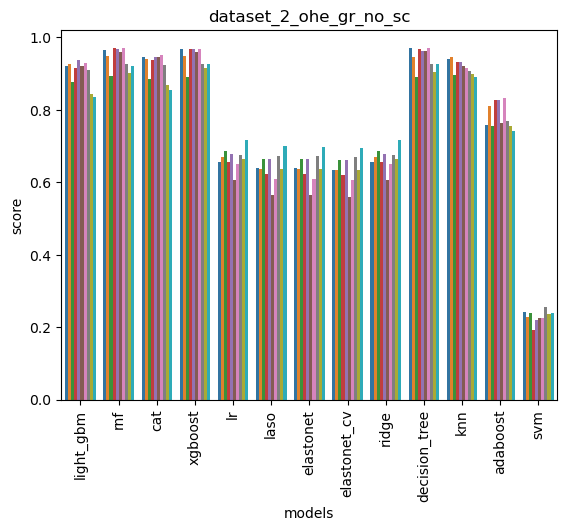

In [75]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_2_ohe_gr_no_sc')

# With OHE with gr with scaling

In [67]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()

X_train_ohe_sc = pd.DataFrame(sc.fit_transform(X_train_ohe), columns= X_train_ohe.columns)

X_test_ohe_sc = pd.DataFrame(sc.transform(X_test_ohe), columns= X_test_ohe.columns)



In [43]:
# X_train

In [68]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [69]:
cv_scores ={}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_train_ohe_sc, y_train, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults 
    

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.063354
0:	learn: 152.5417588	total: 213ms	remaining: 3m 32s
1:	learn: 145.9130894	total: 217ms	remaining: 1m 48s
2:	learn: 139.6328921	total: 220ms	remaining: 1m 13s
3:	learn: 134.0400431	total: 223ms	remaining: 55.4s
4:	learn: 128.6491209	total: 225ms	remaining: 44.8s
5:	learn: 123.6310667	total: 228ms	remaining: 37.8s
6:	learn: 118.9501569	total: 231ms	remaining: 32.7s
7:	learn: 114.6456151	total: 233ms	remaining: 28.9s
8:	learn: 110.7353138	total: 236ms	remaining: 25.9s
9:	learn: 107.0117614	total: 238ms	remaining: 23.6s
10:	learn: 103.8753066	total: 240ms	remaining: 21.6s
11:	learn: 100.9241983	total: 243ms	remaining: 20s
12:	learn: 98.0253707	total: 245ms	remaining: 18.6s
13:	learn: 95.3133067	total: 248ms	remaining: 17.5s
14:	learn: 92.8551178	total: 251ms	remaining: 16.5s
15:	learn: 90.5179098	total: 253ms	remaining: 15.6s
16:	learn: 88.4934115	total: 256ms	remaining: 14.8s
17:	learn: 86.6647931	total: 258ms	remaining: 14.1s
18:	learn: 84.9386008	total: 26

164:	learn: 53.8681742	total: 617ms	remaining: 3.12s
165:	learn: 53.6348445	total: 620ms	remaining: 3.12s
166:	learn: 53.5893211	total: 623ms	remaining: 3.1s
167:	learn: 53.5507771	total: 625ms	remaining: 3.1s
168:	learn: 53.5020156	total: 628ms	remaining: 3.09s
169:	learn: 53.4605329	total: 633ms	remaining: 3.09s
170:	learn: 53.3648006	total: 636ms	remaining: 3.08s
171:	learn: 53.3246111	total: 638ms	remaining: 3.07s
172:	learn: 53.0626783	total: 641ms	remaining: 3.06s
173:	learn: 53.0204485	total: 643ms	remaining: 3.05s
174:	learn: 52.9609486	total: 646ms	remaining: 3.04s
175:	learn: 52.8735649	total: 649ms	remaining: 3.04s
176:	learn: 52.8380346	total: 652ms	remaining: 3.03s
177:	learn: 52.6049680	total: 654ms	remaining: 3.02s
178:	learn: 52.5814601	total: 656ms	remaining: 3.01s
179:	learn: 52.5235884	total: 659ms	remaining: 3s
180:	learn: 52.4951190	total: 661ms	remaining: 2.99s
181:	learn: 52.4422284	total: 665ms	remaining: 2.99s
182:	learn: 52.3679553	total: 667ms	remaining: 2.98

321:	learn: 47.1279679	total: 1.01s	remaining: 2.12s
322:	learn: 47.1115635	total: 1.01s	remaining: 2.12s
323:	learn: 47.0779983	total: 1.01s	remaining: 2.11s
324:	learn: 47.0447808	total: 1.01s	remaining: 2.11s
325:	learn: 47.0142003	total: 1.02s	remaining: 2.1s
326:	learn: 46.9870475	total: 1.02s	remaining: 2.1s
327:	learn: 46.9706844	total: 1.02s	remaining: 2.09s
328:	learn: 46.9521048	total: 1.02s	remaining: 2.09s
329:	learn: 46.9326225	total: 1.03s	remaining: 2.08s
330:	learn: 46.9203209	total: 1.03s	remaining: 2.08s
331:	learn: 46.8997384	total: 1.03s	remaining: 2.08s
332:	learn: 46.8806311	total: 1.03s	remaining: 2.07s
333:	learn: 46.8675097	total: 1.04s	remaining: 2.07s
334:	learn: 46.8477027	total: 1.04s	remaining: 2.06s
335:	learn: 46.8228454	total: 1.04s	remaining: 2.06s
336:	learn: 46.7659327	total: 1.04s	remaining: 2.05s
337:	learn: 46.7573101	total: 1.05s	remaining: 2.05s
338:	learn: 46.7406611	total: 1.05s	remaining: 2.04s
339:	learn: 46.7295269	total: 1.05s	remaining: 2

487:	learn: 44.5131034	total: 1.4s	remaining: 1.47s
488:	learn: 44.5021207	total: 1.41s	remaining: 1.47s
489:	learn: 44.4921060	total: 1.41s	remaining: 1.47s
490:	learn: 44.4793073	total: 1.41s	remaining: 1.46s
491:	learn: 44.4609303	total: 1.41s	remaining: 1.46s
492:	learn: 44.4529828	total: 1.42s	remaining: 1.46s
493:	learn: 44.4491065	total: 1.42s	remaining: 1.45s
494:	learn: 44.4349586	total: 1.42s	remaining: 1.45s
495:	learn: 44.4281230	total: 1.42s	remaining: 1.45s
496:	learn: 44.4206472	total: 1.43s	remaining: 1.44s
497:	learn: 44.4099508	total: 1.43s	remaining: 1.44s
498:	learn: 44.3971671	total: 1.43s	remaining: 1.44s
499:	learn: 44.3837242	total: 1.43s	remaining: 1.43s
500:	learn: 44.3769462	total: 1.44s	remaining: 1.43s
501:	learn: 44.3670817	total: 1.44s	remaining: 1.43s
502:	learn: 44.3608559	total: 1.44s	remaining: 1.42s
503:	learn: 44.3504497	total: 1.44s	remaining: 1.42s
504:	learn: 44.3352606	total: 1.45s	remaining: 1.42s
505:	learn: 44.3193053	total: 1.45s	remaining: 

652:	learn: 43.0934201	total: 1.8s	remaining: 956ms
653:	learn: 43.0854870	total: 1.8s	remaining: 953ms
654:	learn: 43.0816854	total: 1.8s	remaining: 950ms
655:	learn: 43.0731601	total: 1.8s	remaining: 947ms
656:	learn: 43.0633567	total: 1.81s	remaining: 944ms
657:	learn: 43.0608882	total: 1.81s	remaining: 941ms
658:	learn: 43.0522950	total: 1.81s	remaining: 938ms
659:	learn: 43.0447468	total: 1.81s	remaining: 935ms
660:	learn: 43.0394619	total: 1.82s	remaining: 932ms
661:	learn: 43.0343897	total: 1.82s	remaining: 929ms
662:	learn: 43.0296798	total: 1.82s	remaining: 926ms
663:	learn: 43.0265890	total: 1.82s	remaining: 923ms
664:	learn: 43.0193557	total: 1.83s	remaining: 921ms
665:	learn: 43.0135457	total: 1.83s	remaining: 918ms
666:	learn: 43.0055595	total: 1.83s	remaining: 915ms
667:	learn: 43.0016356	total: 1.83s	remaining: 912ms
668:	learn: 42.9938087	total: 1.84s	remaining: 909ms
669:	learn: 42.9885419	total: 1.84s	remaining: 906ms
670:	learn: 42.9835750	total: 1.84s	remaining: 903

817:	learn: 42.2452785	total: 2.19s	remaining: 488ms
818:	learn: 42.2346431	total: 2.2s	remaining: 486ms
819:	learn: 42.2316035	total: 2.2s	remaining: 483ms
820:	learn: 42.2296881	total: 2.2s	remaining: 480ms
821:	learn: 42.2250555	total: 2.21s	remaining: 478ms
822:	learn: 42.2182380	total: 2.21s	remaining: 475ms
823:	learn: 42.2120799	total: 2.21s	remaining: 472ms
824:	learn: 42.2076713	total: 2.21s	remaining: 469ms
825:	learn: 42.2062317	total: 2.21s	remaining: 467ms
826:	learn: 42.2001514	total: 2.22s	remaining: 464ms
827:	learn: 42.1960480	total: 2.22s	remaining: 461ms
828:	learn: 42.1939667	total: 2.22s	remaining: 458ms
829:	learn: 42.1899287	total: 2.22s	remaining: 456ms
830:	learn: 42.1881549	total: 2.23s	remaining: 453ms
831:	learn: 42.1834736	total: 2.23s	remaining: 450ms
832:	learn: 42.1794899	total: 2.23s	remaining: 447ms
833:	learn: 42.1757520	total: 2.23s	remaining: 445ms
834:	learn: 42.1690641	total: 2.24s	remaining: 442ms
835:	learn: 42.1652702	total: 2.24s	remaining: 43

982:	learn: 41.6387597	total: 2.59s	remaining: 44.8ms
983:	learn: 41.6365177	total: 2.59s	remaining: 42.2ms
984:	learn: 41.6313259	total: 2.6s	remaining: 39.5ms
985:	learn: 41.6293405	total: 2.6s	remaining: 36.9ms
986:	learn: 41.6268037	total: 2.6s	remaining: 34.3ms
987:	learn: 41.6232044	total: 2.6s	remaining: 31.6ms
988:	learn: 41.6217074	total: 2.6s	remaining: 29ms
989:	learn: 41.6195224	total: 2.61s	remaining: 26.3ms
990:	learn: 41.6153896	total: 2.61s	remaining: 23.7ms
991:	learn: 41.6139127	total: 2.61s	remaining: 21.1ms
992:	learn: 41.6118175	total: 2.62s	remaining: 18.4ms
993:	learn: 41.6055321	total: 2.62s	remaining: 15.8ms
994:	learn: 41.6026390	total: 2.62s	remaining: 13.2ms
995:	learn: 41.5988342	total: 2.62s	remaining: 10.5ms
996:	learn: 41.5967405	total: 2.63s	remaining: 7.9ms
997:	learn: 41.5959372	total: 2.63s	remaining: 5.26ms
998:	learn: 41.5926384	total: 2.63s	remaining: 2.63ms
999:	learn: 41.5869039	total: 2.63s	remaining: 0us
Learning rate set to 0.063354
0:	learn:

147:	learn: 56.4931594	total: 375ms	remaining: 2.16s
148:	learn: 56.4806852	total: 378ms	remaining: 2.16s
149:	learn: 56.4120267	total: 380ms	remaining: 2.15s
150:	learn: 56.3444725	total: 382ms	remaining: 2.15s
151:	learn: 56.2804152	total: 385ms	remaining: 2.15s
152:	learn: 56.0354993	total: 387ms	remaining: 2.14s
153:	learn: 55.9812991	total: 390ms	remaining: 2.14s
154:	learn: 55.8822772	total: 393ms	remaining: 2.14s
155:	learn: 55.8175172	total: 395ms	remaining: 2.14s
156:	learn: 55.6612471	total: 398ms	remaining: 2.13s
157:	learn: 55.6150563	total: 400ms	remaining: 2.13s
158:	learn: 55.5745799	total: 402ms	remaining: 2.13s
159:	learn: 55.5085652	total: 405ms	remaining: 2.13s
160:	learn: 55.3882435	total: 408ms	remaining: 2.13s
161:	learn: 55.3406348	total: 410ms	remaining: 2.12s
162:	learn: 55.2462990	total: 413ms	remaining: 2.12s
163:	learn: 55.1604921	total: 415ms	remaining: 2.12s
164:	learn: 55.1063413	total: 417ms	remaining: 2.11s
165:	learn: 55.0208537	total: 420ms	remaining:

312:	learn: 48.9908819	total: 772ms	remaining: 1.7s
313:	learn: 48.9598277	total: 775ms	remaining: 1.69s
314:	learn: 48.9274258	total: 777ms	remaining: 1.69s
315:	learn: 48.9205847	total: 780ms	remaining: 1.69s
316:	learn: 48.9063673	total: 782ms	remaining: 1.69s
317:	learn: 48.8972449	total: 784ms	remaining: 1.68s
318:	learn: 48.8910773	total: 787ms	remaining: 1.68s
319:	learn: 48.8659118	total: 789ms	remaining: 1.68s
320:	learn: 48.8477988	total: 792ms	remaining: 1.67s
321:	learn: 48.8324443	total: 794ms	remaining: 1.67s
322:	learn: 48.8099387	total: 796ms	remaining: 1.67s
323:	learn: 48.8035277	total: 799ms	remaining: 1.67s
324:	learn: 48.7923381	total: 801ms	remaining: 1.66s
325:	learn: 48.7808209	total: 803ms	remaining: 1.66s
326:	learn: 48.7574377	total: 806ms	remaining: 1.66s
327:	learn: 48.7424250	total: 808ms	remaining: 1.66s
328:	learn: 48.7261472	total: 810ms	remaining: 1.65s
329:	learn: 48.7206185	total: 813ms	remaining: 1.65s
330:	learn: 48.7061423	total: 815ms	remaining: 

478:	learn: 46.5717334	total: 1.17s	remaining: 1.27s
479:	learn: 46.5596233	total: 1.17s	remaining: 1.27s
480:	learn: 46.5573869	total: 1.17s	remaining: 1.26s
481:	learn: 46.5443999	total: 1.17s	remaining: 1.26s
482:	learn: 46.5347924	total: 1.18s	remaining: 1.26s
483:	learn: 46.5232268	total: 1.18s	remaining: 1.26s
484:	learn: 46.5176209	total: 1.18s	remaining: 1.25s
485:	learn: 46.4779181	total: 1.18s	remaining: 1.25s
486:	learn: 46.4712674	total: 1.19s	remaining: 1.25s
487:	learn: 46.4622709	total: 1.19s	remaining: 1.25s
488:	learn: 46.4545549	total: 1.19s	remaining: 1.24s
489:	learn: 46.4509617	total: 1.19s	remaining: 1.24s
490:	learn: 46.4455057	total: 1.2s	remaining: 1.24s
491:	learn: 46.4344148	total: 1.2s	remaining: 1.24s
492:	learn: 46.4290113	total: 1.2s	remaining: 1.23s
493:	learn: 46.4045735	total: 1.2s	remaining: 1.23s
494:	learn: 46.4014113	total: 1.21s	remaining: 1.23s
495:	learn: 46.3926770	total: 1.21s	remaining: 1.23s
496:	learn: 46.3884248	total: 1.21s	remaining: 1.2

645:	learn: 45.1884577	total: 1.56s	remaining: 858ms
646:	learn: 45.1824646	total: 1.57s	remaining: 855ms
647:	learn: 45.1740431	total: 1.57s	remaining: 853ms
648:	learn: 45.1699729	total: 1.57s	remaining: 851ms
649:	learn: 45.1645970	total: 1.57s	remaining: 848ms
650:	learn: 45.1512866	total: 1.58s	remaining: 846ms
651:	learn: 45.1464663	total: 1.58s	remaining: 843ms
652:	learn: 45.1182110	total: 1.58s	remaining: 841ms
653:	learn: 45.1161613	total: 1.58s	remaining: 839ms
654:	learn: 45.1078762	total: 1.59s	remaining: 836ms
655:	learn: 45.0976083	total: 1.59s	remaining: 834ms
656:	learn: 45.0950239	total: 1.59s	remaining: 831ms
657:	learn: 45.0875327	total: 1.59s	remaining: 829ms
658:	learn: 45.0798975	total: 1.6s	remaining: 826ms
659:	learn: 45.0744802	total: 1.6s	remaining: 824ms
660:	learn: 45.0695805	total: 1.6s	remaining: 822ms
661:	learn: 45.0647429	total: 1.6s	remaining: 819ms
662:	learn: 45.0604415	total: 1.61s	remaining: 817ms
663:	learn: 45.0534404	total: 1.61s	remaining: 814

810:	learn: 44.2975121	total: 1.96s	remaining: 458ms
811:	learn: 44.2899886	total: 1.97s	remaining: 455ms
812:	learn: 44.2848605	total: 1.97s	remaining: 453ms
813:	learn: 44.2804976	total: 1.97s	remaining: 450ms
814:	learn: 44.2617560	total: 1.97s	remaining: 448ms
815:	learn: 44.2578167	total: 1.98s	remaining: 446ms
816:	learn: 44.2539724	total: 1.98s	remaining: 443ms
817:	learn: 44.2487508	total: 1.98s	remaining: 441ms
818:	learn: 44.2450346	total: 1.98s	remaining: 438ms
819:	learn: 44.2425439	total: 1.99s	remaining: 436ms
820:	learn: 44.2408152	total: 1.99s	remaining: 433ms
821:	learn: 44.2378878	total: 1.99s	remaining: 431ms
822:	learn: 44.2341730	total: 1.99s	remaining: 429ms
823:	learn: 44.2292576	total: 2s	remaining: 426ms
824:	learn: 44.2274901	total: 2s	remaining: 424ms
825:	learn: 44.2221978	total: 2s	remaining: 421ms
826:	learn: 44.2205656	total: 2s	remaining: 419ms
827:	learn: 44.2169507	total: 2s	remaining: 416ms
828:	learn: 44.2137806	total: 2.01s	remaining: 414ms
829:	lea

975:	learn: 43.7135297	total: 2.36s	remaining: 58ms
976:	learn: 43.7123417	total: 2.36s	remaining: 55.6ms
977:	learn: 43.7089025	total: 2.36s	remaining: 53.2ms
978:	learn: 43.7074816	total: 2.37s	remaining: 50.8ms
979:	learn: 43.7054012	total: 2.37s	remaining: 48.3ms
980:	learn: 43.7028957	total: 2.37s	remaining: 45.9ms
981:	learn: 43.7001067	total: 2.37s	remaining: 43.5ms
982:	learn: 43.6998221	total: 2.38s	remaining: 41.1ms
983:	learn: 43.6987177	total: 2.38s	remaining: 38.7ms
984:	learn: 43.6964831	total: 2.38s	remaining: 36.3ms
985:	learn: 43.6942542	total: 2.38s	remaining: 33.8ms
986:	learn: 43.6904617	total: 2.38s	remaining: 31.4ms
987:	learn: 43.6875919	total: 2.39s	remaining: 29ms
988:	learn: 43.6734356	total: 2.39s	remaining: 26.6ms
989:	learn: 43.6701874	total: 2.39s	remaining: 24.2ms
990:	learn: 43.6688437	total: 2.39s	remaining: 21.8ms
991:	learn: 43.6663781	total: 2.4s	remaining: 19.3ms
992:	learn: 43.6624046	total: 2.4s	remaining: 16.9ms
993:	learn: 43.6583369	total: 2.4s

166:	learn: 55.8571432	total: 404ms	remaining: 2.02s
167:	learn: 55.8234091	total: 407ms	remaining: 2.01s
168:	learn: 55.7732105	total: 409ms	remaining: 2.01s
169:	learn: 55.7458648	total: 411ms	remaining: 2.01s
170:	learn: 55.6453635	total: 414ms	remaining: 2.01s
171:	learn: 55.5917841	total: 416ms	remaining: 2s
172:	learn: 55.5451880	total: 419ms	remaining: 2s
173:	learn: 55.4776739	total: 421ms	remaining: 2s
174:	learn: 55.4398444	total: 423ms	remaining: 2s
175:	learn: 55.3894798	total: 426ms	remaining: 1.99s
176:	learn: 55.3611855	total: 428ms	remaining: 1.99s
177:	learn: 55.2904748	total: 430ms	remaining: 1.99s
178:	learn: 55.2547456	total: 433ms	remaining: 1.98s
179:	learn: 55.2091738	total: 435ms	remaining: 1.98s
180:	learn: 55.1210693	total: 437ms	remaining: 1.98s
181:	learn: 55.0419795	total: 440ms	remaining: 1.98s
182:	learn: 55.0223814	total: 442ms	remaining: 1.97s
183:	learn: 54.9793217	total: 444ms	remaining: 1.97s
184:	learn: 54.7462445	total: 447ms	remaining: 1.97s
185:	

331:	learn: 48.9337083	total: 799ms	remaining: 1.61s
332:	learn: 48.9172105	total: 802ms	remaining: 1.61s
333:	learn: 48.8954214	total: 804ms	remaining: 1.6s
334:	learn: 48.8803678	total: 807ms	remaining: 1.6s
335:	learn: 48.8652188	total: 810ms	remaining: 1.6s
336:	learn: 48.8534726	total: 812ms	remaining: 1.6s
337:	learn: 48.8323412	total: 814ms	remaining: 1.59s
338:	learn: 48.8176569	total: 817ms	remaining: 1.59s
339:	learn: 48.7789538	total: 819ms	remaining: 1.59s
340:	learn: 48.7636905	total: 822ms	remaining: 1.59s
341:	learn: 48.7485079	total: 824ms	remaining: 1.58s
342:	learn: 48.7392771	total: 827ms	remaining: 1.58s
343:	learn: 48.7220493	total: 829ms	remaining: 1.58s
344:	learn: 48.6994761	total: 831ms	remaining: 1.58s
345:	learn: 48.6916645	total: 834ms	remaining: 1.58s
346:	learn: 48.6718960	total: 836ms	remaining: 1.57s
347:	learn: 48.6485733	total: 839ms	remaining: 1.57s
348:	learn: 48.6210049	total: 841ms	remaining: 1.57s
349:	learn: 48.5908254	total: 844ms	remaining: 1.5

494:	learn: 46.3926378	total: 1.2s	remaining: 1.22s
495:	learn: 46.3872845	total: 1.2s	remaining: 1.22s
496:	learn: 46.3767522	total: 1.2s	remaining: 1.22s
497:	learn: 46.3710263	total: 1.2s	remaining: 1.21s
498:	learn: 46.3576622	total: 1.21s	remaining: 1.21s
499:	learn: 46.3455592	total: 1.21s	remaining: 1.21s
500:	learn: 46.3337637	total: 1.21s	remaining: 1.21s
501:	learn: 46.3270561	total: 1.21s	remaining: 1.2s
502:	learn: 46.3232092	total: 1.22s	remaining: 1.2s
503:	learn: 46.3157727	total: 1.22s	remaining: 1.2s
504:	learn: 46.3026278	total: 1.22s	remaining: 1.2s
505:	learn: 46.2861184	total: 1.22s	remaining: 1.19s
506:	learn: 46.2750053	total: 1.23s	remaining: 1.19s
507:	learn: 46.2699365	total: 1.23s	remaining: 1.19s
508:	learn: 46.2603952	total: 1.23s	remaining: 1.19s
509:	learn: 46.2499498	total: 1.23s	remaining: 1.18s
510:	learn: 46.2433642	total: 1.24s	remaining: 1.18s
511:	learn: 46.2329976	total: 1.24s	remaining: 1.18s
512:	learn: 46.2263400	total: 1.24s	remaining: 1.18s
5

657:	learn: 45.0979771	total: 1.59s	remaining: 829ms
658:	learn: 45.0934714	total: 1.6s	remaining: 826ms
659:	learn: 45.0893834	total: 1.6s	remaining: 824ms
660:	learn: 45.0836633	total: 1.6s	remaining: 822ms
661:	learn: 45.0787650	total: 1.6s	remaining: 820ms
662:	learn: 45.0743123	total: 1.61s	remaining: 817ms
663:	learn: 45.0701421	total: 1.61s	remaining: 815ms
664:	learn: 45.0635507	total: 1.61s	remaining: 812ms
665:	learn: 45.0549824	total: 1.61s	remaining: 810ms
666:	learn: 45.0495878	total: 1.62s	remaining: 807ms
667:	learn: 45.0465825	total: 1.62s	remaining: 805ms
668:	learn: 45.0403148	total: 1.62s	remaining: 803ms
669:	learn: 45.0359468	total: 1.62s	remaining: 800ms
670:	learn: 45.0318838	total: 1.63s	remaining: 798ms
671:	learn: 45.0271759	total: 1.63s	remaining: 795ms
672:	learn: 45.0250656	total: 1.63s	remaining: 793ms
673:	learn: 45.0162825	total: 1.63s	remaining: 791ms
674:	learn: 45.0111723	total: 1.64s	remaining: 788ms
675:	learn: 45.0062070	total: 1.64s	remaining: 786

814:	learn: 44.2182066	total: 1.98s	remaining: 449ms
815:	learn: 44.2119039	total: 1.98s	remaining: 447ms
816:	learn: 44.2058977	total: 1.98s	remaining: 444ms
817:	learn: 44.1818436	total: 1.99s	remaining: 442ms
818:	learn: 44.1777944	total: 1.99s	remaining: 440ms
819:	learn: 44.1722343	total: 1.99s	remaining: 437ms
820:	learn: 44.1651994	total: 1.99s	remaining: 435ms
821:	learn: 44.1610926	total: 2s	remaining: 432ms
822:	learn: 44.1560704	total: 2s	remaining: 430ms
823:	learn: 44.1514959	total: 2s	remaining: 427ms
824:	learn: 44.1452806	total: 2s	remaining: 425ms
825:	learn: 44.1433666	total: 2s	remaining: 423ms
826:	learn: 44.1384266	total: 2.01s	remaining: 420ms
827:	learn: 44.1334352	total: 2.01s	remaining: 418ms
828:	learn: 44.1310922	total: 2.01s	remaining: 415ms
829:	learn: 44.1280884	total: 2.02s	remaining: 413ms
830:	learn: 44.1236019	total: 2.02s	remaining: 411ms
831:	learn: 44.1176251	total: 2.02s	remaining: 408ms
832:	learn: 44.1154561	total: 2.02s	remaining: 406ms
833:	lea

975:	learn: 43.6421097	total: 2.37s	remaining: 58.4ms
976:	learn: 43.6381917	total: 2.38s	remaining: 55.9ms
977:	learn: 43.6345925	total: 2.38s	remaining: 53.5ms
978:	learn: 43.6336392	total: 2.38s	remaining: 51.1ms
979:	learn: 43.6304353	total: 2.38s	remaining: 48.7ms
980:	learn: 43.6272962	total: 2.39s	remaining: 46.2ms
981:	learn: 43.6254439	total: 2.39s	remaining: 43.8ms
982:	learn: 43.6208573	total: 2.39s	remaining: 41.4ms
983:	learn: 43.6193980	total: 2.39s	remaining: 38.9ms
984:	learn: 43.6142802	total: 2.4s	remaining: 36.5ms
985:	learn: 43.5971281	total: 2.4s	remaining: 34.1ms
986:	learn: 43.5963009	total: 2.4s	remaining: 31.6ms
987:	learn: 43.5946306	total: 2.4s	remaining: 29.2ms
988:	learn: 43.5922216	total: 2.41s	remaining: 26.8ms
989:	learn: 43.5907481	total: 2.41s	remaining: 24.3ms
990:	learn: 43.5892764	total: 2.41s	remaining: 21.9ms
991:	learn: 43.5861309	total: 2.41s	remaining: 19.5ms
992:	learn: 43.5823690	total: 2.42s	remaining: 17ms
993:	learn: 43.5779806	total: 2.42

166:	learn: 55.5733729	total: 403ms	remaining: 2.01s
167:	learn: 55.5444623	total: 405ms	remaining: 2.01s
168:	learn: 55.5165642	total: 408ms	remaining: 2s
169:	learn: 55.4969975	total: 410ms	remaining: 2s
170:	learn: 55.4412430	total: 413ms	remaining: 2s
171:	learn: 55.4167666	total: 415ms	remaining: 2s
172:	learn: 55.3538205	total: 418ms	remaining: 2s
173:	learn: 55.3035679	total: 420ms	remaining: 1.99s
174:	learn: 55.2750403	total: 422ms	remaining: 1.99s
175:	learn: 55.1805300	total: 425ms	remaining: 1.99s
176:	learn: 55.1009224	total: 427ms	remaining: 1.99s
177:	learn: 55.0771148	total: 429ms	remaining: 1.98s
178:	learn: 55.0321304	total: 432ms	remaining: 1.98s
179:	learn: 54.9848729	total: 434ms	remaining: 1.98s
180:	learn: 54.9254239	total: 436ms	remaining: 1.97s
181:	learn: 54.8842248	total: 439ms	remaining: 1.97s
182:	learn: 54.8477044	total: 441ms	remaining: 1.97s
183:	learn: 54.8140981	total: 444ms	remaining: 1.97s
184:	learn: 54.6156620	total: 446ms	remaining: 1.97s
185:	lea

331:	learn: 49.6632055	total: 802ms	remaining: 1.61s
332:	learn: 49.6385479	total: 804ms	remaining: 1.61s
333:	learn: 49.6255661	total: 807ms	remaining: 1.61s
334:	learn: 49.5969835	total: 809ms	remaining: 1.61s
335:	learn: 49.5720737	total: 812ms	remaining: 1.6s
336:	learn: 49.5515134	total: 814ms	remaining: 1.6s
337:	learn: 49.5311657	total: 817ms	remaining: 1.6s
338:	learn: 49.5148554	total: 819ms	remaining: 1.6s
339:	learn: 49.5087729	total: 822ms	remaining: 1.59s
340:	learn: 49.4809617	total: 824ms	remaining: 1.59s
341:	learn: 49.4585313	total: 827ms	remaining: 1.59s
342:	learn: 49.4281501	total: 829ms	remaining: 1.59s
343:	learn: 49.3950729	total: 831ms	remaining: 1.58s
344:	learn: 49.3800664	total: 834ms	remaining: 1.58s
345:	learn: 49.3584691	total: 836ms	remaining: 1.58s
346:	learn: 49.3347137	total: 839ms	remaining: 1.58s
347:	learn: 49.2654788	total: 841ms	remaining: 1.57s
348:	learn: 49.2359722	total: 843ms	remaining: 1.57s
349:	learn: 49.2250839	total: 846ms	remaining: 1.5

494:	learn: 47.0788067	total: 1.2s	remaining: 1.22s
495:	learn: 47.0668755	total: 1.2s	remaining: 1.22s
496:	learn: 47.0592132	total: 1.2s	remaining: 1.22s
497:	learn: 47.0419211	total: 1.21s	remaining: 1.22s
498:	learn: 47.0349504	total: 1.21s	remaining: 1.21s
499:	learn: 47.0274097	total: 1.21s	remaining: 1.21s
500:	learn: 47.0236421	total: 1.21s	remaining: 1.21s
501:	learn: 47.0143347	total: 1.22s	remaining: 1.21s
502:	learn: 47.0037605	total: 1.22s	remaining: 1.2s
503:	learn: 46.9918385	total: 1.22s	remaining: 1.2s
504:	learn: 46.9800290	total: 1.22s	remaining: 1.2s
505:	learn: 46.9725678	total: 1.23s	remaining: 1.2s
506:	learn: 46.9671982	total: 1.23s	remaining: 1.19s
507:	learn: 46.9567928	total: 1.23s	remaining: 1.19s
508:	learn: 46.9417883	total: 1.23s	remaining: 1.19s
509:	learn: 46.9293346	total: 1.24s	remaining: 1.19s
510:	learn: 46.9258282	total: 1.24s	remaining: 1.18s
511:	learn: 46.9145232	total: 1.24s	remaining: 1.18s
512:	learn: 46.8860505	total: 1.24s	remaining: 1.18s


657:	learn: 45.7831298	total: 1.6s	remaining: 830ms
658:	learn: 45.7715585	total: 1.6s	remaining: 828ms
659:	learn: 45.7643633	total: 1.6s	remaining: 825ms
660:	learn: 45.7517235	total: 1.6s	remaining: 823ms
661:	learn: 45.7420803	total: 1.61s	remaining: 820ms
662:	learn: 45.7378985	total: 1.61s	remaining: 818ms
663:	learn: 45.7326541	total: 1.61s	remaining: 816ms
664:	learn: 45.7263637	total: 1.61s	remaining: 813ms
665:	learn: 45.7215728	total: 1.62s	remaining: 811ms
666:	learn: 45.7130418	total: 1.62s	remaining: 808ms
667:	learn: 45.7047891	total: 1.62s	remaining: 806ms
668:	learn: 45.6926748	total: 1.62s	remaining: 804ms
669:	learn: 45.6893368	total: 1.63s	remaining: 801ms
670:	learn: 45.6835053	total: 1.63s	remaining: 799ms
671:	learn: 45.6794651	total: 1.63s	remaining: 796ms
672:	learn: 45.6741172	total: 1.63s	remaining: 794ms
673:	learn: 45.6681076	total: 1.64s	remaining: 792ms
674:	learn: 45.6650045	total: 1.64s	remaining: 789ms
675:	learn: 45.6614372	total: 1.64s	remaining: 787

820:	learn: 44.9590649	total: 1.99s	remaining: 435ms
821:	learn: 44.9550886	total: 2s	remaining: 432ms
822:	learn: 44.9517413	total: 2s	remaining: 430ms
823:	learn: 44.9467274	total: 2s	remaining: 428ms
824:	learn: 44.9449528	total: 2s	remaining: 425ms
825:	learn: 44.9443063	total: 2.01s	remaining: 423ms
826:	learn: 44.9412173	total: 2.01s	remaining: 420ms
827:	learn: 44.9364160	total: 2.01s	remaining: 418ms
828:	learn: 44.9326522	total: 2.01s	remaining: 416ms
829:	learn: 44.9296013	total: 2.02s	remaining: 413ms
830:	learn: 44.9217022	total: 2.02s	remaining: 411ms
831:	learn: 44.9165868	total: 2.02s	remaining: 408ms
832:	learn: 44.9125894	total: 2.02s	remaining: 406ms
833:	learn: 44.9109436	total: 2.03s	remaining: 403ms
834:	learn: 44.9076124	total: 2.03s	remaining: 401ms
835:	learn: 44.8990360	total: 2.03s	remaining: 399ms
836:	learn: 44.8970091	total: 2.03s	remaining: 396ms
837:	learn: 44.8950789	total: 2.04s	remaining: 394ms
838:	learn: 44.8916967	total: 2.04s	remaining: 391ms
839:	

982:	learn: 44.4046691	total: 2.39s	remaining: 41.4ms
983:	learn: 44.4019151	total: 2.4s	remaining: 38.9ms
984:	learn: 44.3996178	total: 2.4s	remaining: 36.5ms
985:	learn: 44.3973749	total: 2.4s	remaining: 34.1ms
986:	learn: 44.3938381	total: 2.4s	remaining: 31.6ms
987:	learn: 44.3904458	total: 2.4s	remaining: 29.2ms
988:	learn: 44.3869197	total: 2.41s	remaining: 26.8ms
989:	learn: 44.3832126	total: 2.41s	remaining: 24.3ms
990:	learn: 44.3800261	total: 2.41s	remaining: 21.9ms
991:	learn: 44.3788221	total: 2.41s	remaining: 19.5ms
992:	learn: 44.3769299	total: 2.42s	remaining: 17ms
993:	learn: 44.3757594	total: 2.42s	remaining: 14.6ms
994:	learn: 44.3696133	total: 2.42s	remaining: 12.2ms
995:	learn: 44.3658431	total: 2.42s	remaining: 9.74ms
996:	learn: 44.3647233	total: 2.43s	remaining: 7.3ms
997:	learn: 44.3628116	total: 2.43s	remaining: 4.87ms
998:	learn: 44.3612276	total: 2.43s	remaining: 2.43ms
999:	learn: 44.3580513	total: 2.43s	remaining: 0us
Learning rate set to 0.063354
0:	learn:

158:	learn: 56.7529443	total: 399ms	remaining: 2.11s
159:	learn: 56.4895045	total: 402ms	remaining: 2.11s
160:	learn: 56.4288763	total: 404ms	remaining: 2.11s
161:	learn: 56.3731569	total: 407ms	remaining: 2.1s
162:	learn: 56.3279797	total: 410ms	remaining: 2.1s
163:	learn: 56.2690893	total: 412ms	remaining: 2.1s
164:	learn: 56.1943525	total: 415ms	remaining: 2.1s
165:	learn: 56.1253169	total: 417ms	remaining: 2.1s
166:	learn: 56.0715502	total: 419ms	remaining: 2.09s
167:	learn: 56.0437056	total: 422ms	remaining: 2.09s
168:	learn: 56.0001379	total: 424ms	remaining: 2.08s
169:	learn: 55.9274140	total: 426ms	remaining: 2.08s
170:	learn: 55.8778534	total: 429ms	remaining: 2.08s
171:	learn: 55.7856633	total: 431ms	remaining: 2.08s
172:	learn: 55.7016868	total: 434ms	remaining: 2.07s
173:	learn: 55.6462805	total: 436ms	remaining: 2.07s
174:	learn: 55.6002102	total: 439ms	remaining: 2.07s
175:	learn: 55.3683148	total: 441ms	remaining: 2.06s
176:	learn: 55.3252315	total: 443ms	remaining: 2.06

323:	learn: 49.7991787	total: 799ms	remaining: 1.67s
324:	learn: 49.7842828	total: 801ms	remaining: 1.66s
325:	learn: 49.7754144	total: 804ms	remaining: 1.66s
326:	learn: 49.7579509	total: 806ms	remaining: 1.66s
327:	learn: 49.7342951	total: 809ms	remaining: 1.66s
328:	learn: 49.7220035	total: 811ms	remaining: 1.65s
329:	learn: 49.7158881	total: 813ms	remaining: 1.65s
330:	learn: 49.6940920	total: 816ms	remaining: 1.65s
331:	learn: 49.6884578	total: 818ms	remaining: 1.65s
332:	learn: 49.6737559	total: 820ms	remaining: 1.64s
333:	learn: 49.6632049	total: 823ms	remaining: 1.64s
334:	learn: 49.6520035	total: 825ms	remaining: 1.64s
335:	learn: 49.6239839	total: 828ms	remaining: 1.64s
336:	learn: 49.5982725	total: 830ms	remaining: 1.63s
337:	learn: 49.5783567	total: 832ms	remaining: 1.63s
338:	learn: 49.5565056	total: 835ms	remaining: 1.63s
339:	learn: 49.5279345	total: 837ms	remaining: 1.62s
340:	learn: 49.5044284	total: 840ms	remaining: 1.62s
341:	learn: 49.4784119	total: 842ms	remaining:

485:	learn: 47.5602623	total: 1.19s	remaining: 1.26s
486:	learn: 47.5529873	total: 1.2s	remaining: 1.26s
487:	learn: 47.5482600	total: 1.2s	remaining: 1.26s
488:	learn: 47.5387658	total: 1.2s	remaining: 1.25s
489:	learn: 47.5301455	total: 1.2s	remaining: 1.25s
490:	learn: 47.5146753	total: 1.2s	remaining: 1.25s
491:	learn: 47.5063912	total: 1.21s	remaining: 1.25s
492:	learn: 47.4979672	total: 1.21s	remaining: 1.24s
493:	learn: 47.4567774	total: 1.21s	remaining: 1.24s
494:	learn: 47.4501371	total: 1.21s	remaining: 1.24s
495:	learn: 47.4451235	total: 1.22s	remaining: 1.24s
496:	learn: 47.4384394	total: 1.22s	remaining: 1.23s
497:	learn: 47.4328342	total: 1.22s	remaining: 1.23s
498:	learn: 47.4210567	total: 1.22s	remaining: 1.23s
499:	learn: 47.4190825	total: 1.23s	remaining: 1.23s
500:	learn: 47.4054956	total: 1.23s	remaining: 1.22s
501:	learn: 47.3971361	total: 1.23s	remaining: 1.22s
502:	learn: 47.3842751	total: 1.23s	remaining: 1.22s
503:	learn: 47.3769894	total: 1.24s	remaining: 1.22

648:	learn: 46.1238764	total: 1.59s	remaining: 861ms
649:	learn: 46.1141794	total: 1.59s	remaining: 859ms
650:	learn: 46.1081839	total: 1.6s	remaining: 856ms
651:	learn: 46.1038824	total: 1.6s	remaining: 854ms
652:	learn: 46.0951418	total: 1.6s	remaining: 851ms
653:	learn: 46.0890637	total: 1.6s	remaining: 849ms
654:	learn: 46.0817609	total: 1.61s	remaining: 847ms
655:	learn: 46.0715956	total: 1.61s	remaining: 844ms
656:	learn: 46.0596862	total: 1.61s	remaining: 842ms
657:	learn: 46.0531313	total: 1.61s	remaining: 839ms
658:	learn: 46.0494078	total: 1.62s	remaining: 837ms
659:	learn: 46.0417182	total: 1.62s	remaining: 834ms
660:	learn: 46.0325549	total: 1.62s	remaining: 832ms
661:	learn: 46.0279691	total: 1.62s	remaining: 830ms
662:	learn: 46.0240054	total: 1.63s	remaining: 827ms
663:	learn: 46.0206409	total: 1.63s	remaining: 825ms
664:	learn: 46.0149098	total: 1.63s	remaining: 822ms
665:	learn: 46.0079988	total: 1.63s	remaining: 820ms
666:	learn: 45.9998199	total: 1.64s	remaining: 817

816:	learn: 45.3440680	total: 2s	remaining: 449ms
817:	learn: 45.3396625	total: 2.01s	remaining: 447ms
818:	learn: 45.3370702	total: 2.01s	remaining: 444ms
819:	learn: 45.3327350	total: 2.01s	remaining: 442ms
820:	learn: 45.3283010	total: 2.02s	remaining: 439ms
821:	learn: 45.3234513	total: 2.02s	remaining: 437ms
822:	learn: 45.3093028	total: 2.02s	remaining: 435ms
823:	learn: 45.3031867	total: 2.02s	remaining: 432ms
824:	learn: 45.3004839	total: 2.02s	remaining: 430ms
825:	learn: 45.2949096	total: 2.03s	remaining: 427ms
826:	learn: 45.2918147	total: 2.03s	remaining: 425ms
827:	learn: 45.2902063	total: 2.03s	remaining: 422ms
828:	learn: 45.2875655	total: 2.03s	remaining: 420ms
829:	learn: 45.2838410	total: 2.04s	remaining: 417ms
830:	learn: 45.2811629	total: 2.04s	remaining: 415ms
831:	learn: 45.2774546	total: 2.04s	remaining: 412ms
832:	learn: 45.2750927	total: 2.04s	remaining: 410ms
833:	learn: 45.2685273	total: 2.05s	remaining: 407ms
834:	learn: 45.2644197	total: 2.05s	remaining: 40

978:	learn: 44.8149900	total: 2.4s	remaining: 51.5ms
979:	learn: 44.8115414	total: 2.4s	remaining: 49.1ms
980:	learn: 44.8104307	total: 2.41s	remaining: 46.6ms
981:	learn: 44.7975826	total: 2.41s	remaining: 44.2ms
982:	learn: 44.7953545	total: 2.41s	remaining: 41.7ms
983:	learn: 44.7928159	total: 2.41s	remaining: 39.3ms
984:	learn: 44.7892155	total: 2.42s	remaining: 36.8ms
985:	learn: 44.7862325	total: 2.42s	remaining: 34.3ms
986:	learn: 44.7842704	total: 2.42s	remaining: 31.9ms
987:	learn: 44.7816541	total: 2.42s	remaining: 29.4ms
988:	learn: 44.7806474	total: 2.43s	remaining: 27ms
989:	learn: 44.7749747	total: 2.43s	remaining: 24.5ms
990:	learn: 44.7740078	total: 2.43s	remaining: 22.1ms
991:	learn: 44.7729848	total: 2.43s	remaining: 19.6ms
992:	learn: 44.7711918	total: 2.44s	remaining: 17.2ms
993:	learn: 44.7707026	total: 2.44s	remaining: 14.7ms
994:	learn: 44.7697633	total: 2.44s	remaining: 12.3ms
995:	learn: 44.7693754	total: 2.44s	remaining: 9.81ms
996:	learn: 44.7664935	total: 2.

159:	learn: 55.9719730	total: 401ms	remaining: 2.1s
160:	learn: 55.9120186	total: 404ms	remaining: 2.1s
161:	learn: 55.8403508	total: 406ms	remaining: 2.1s
162:	learn: 55.7806910	total: 409ms	remaining: 2.1s
163:	learn: 55.6587995	total: 411ms	remaining: 2.1s
164:	learn: 55.6044779	total: 414ms	remaining: 2.09s
165:	learn: 55.3422694	total: 416ms	remaining: 2.09s
166:	learn: 55.3137512	total: 419ms	remaining: 2.09s
167:	learn: 55.2700032	total: 421ms	remaining: 2.08s
168:	learn: 55.0690734	total: 424ms	remaining: 2.08s
169:	learn: 55.0264766	total: 426ms	remaining: 2.08s
170:	learn: 54.9494307	total: 428ms	remaining: 2.08s
171:	learn: 54.9341562	total: 431ms	remaining: 2.07s
172:	learn: 54.9003984	total: 433ms	remaining: 2.07s
173:	learn: 54.8419912	total: 436ms	remaining: 2.07s
174:	learn: 54.7982576	total: 438ms	remaining: 2.06s
175:	learn: 54.7395080	total: 440ms	remaining: 2.06s
176:	learn: 54.6898569	total: 443ms	remaining: 2.06s
177:	learn: 54.6542510	total: 445ms	remaining: 2.06

322:	learn: 49.6472608	total: 798ms	remaining: 1.67s
323:	learn: 49.6221203	total: 801ms	remaining: 1.67s
324:	learn: 49.6075793	total: 804ms	remaining: 1.67s
325:	learn: 49.5948824	total: 806ms	remaining: 1.67s
326:	learn: 49.5743347	total: 809ms	remaining: 1.66s
327:	learn: 49.5498740	total: 811ms	remaining: 1.66s
328:	learn: 49.5249567	total: 814ms	remaining: 1.66s
329:	learn: 49.5161875	total: 816ms	remaining: 1.66s
330:	learn: 49.4791912	total: 818ms	remaining: 1.65s
331:	learn: 49.4031428	total: 821ms	remaining: 1.65s
332:	learn: 49.3807747	total: 823ms	remaining: 1.65s
333:	learn: 49.3744870	total: 825ms	remaining: 1.65s
334:	learn: 49.3601431	total: 828ms	remaining: 1.64s
335:	learn: 49.3411694	total: 830ms	remaining: 1.64s
336:	learn: 49.3118890	total: 833ms	remaining: 1.64s
337:	learn: 49.2977283	total: 835ms	remaining: 1.64s
338:	learn: 49.2778969	total: 838ms	remaining: 1.63s
339:	learn: 49.2645674	total: 840ms	remaining: 1.63s
340:	learn: 49.2527064	total: 842ms	remaining:

545:	learn: 46.1761413	total: 1.36s	remaining: 1.13s
546:	learn: 46.1659113	total: 1.37s	remaining: 1.13s
547:	learn: 46.1586266	total: 1.37s	remaining: 1.13s
548:	learn: 46.1518939	total: 1.37s	remaining: 1.13s
549:	learn: 46.1293813	total: 1.37s	remaining: 1.12s
550:	learn: 46.1201816	total: 1.38s	remaining: 1.12s
551:	learn: 46.1121368	total: 1.38s	remaining: 1.12s
552:	learn: 46.0982425	total: 1.38s	remaining: 1.12s
553:	learn: 46.0937657	total: 1.38s	remaining: 1.11s
554:	learn: 46.0784959	total: 1.39s	remaining: 1.11s
555:	learn: 46.0623453	total: 1.39s	remaining: 1.11s
556:	learn: 46.0553856	total: 1.39s	remaining: 1.11s
557:	learn: 46.0506002	total: 1.39s	remaining: 1.1s
558:	learn: 46.0408995	total: 1.4s	remaining: 1.1s
559:	learn: 46.0326351	total: 1.4s	remaining: 1.1s
560:	learn: 46.0252134	total: 1.4s	remaining: 1.1s
561:	learn: 46.0180082	total: 1.4s	remaining: 1.09s
562:	learn: 46.0083581	total: 1.41s	remaining: 1.09s
563:	learn: 46.0004848	total: 1.41s	remaining: 1.09s
5

707:	learn: 44.9879666	total: 1.76s	remaining: 727ms
708:	learn: 44.9775168	total: 1.76s	remaining: 724ms
709:	learn: 44.9719746	total: 1.77s	remaining: 722ms
710:	learn: 44.9699245	total: 1.77s	remaining: 719ms
711:	learn: 44.9667659	total: 1.77s	remaining: 717ms
712:	learn: 44.9589315	total: 1.77s	remaining: 714ms
713:	learn: 44.9519892	total: 1.78s	remaining: 712ms
714:	learn: 44.9497571	total: 1.78s	remaining: 709ms
715:	learn: 44.9455863	total: 1.78s	remaining: 707ms
716:	learn: 44.9390745	total: 1.78s	remaining: 704ms
717:	learn: 44.9327781	total: 1.79s	remaining: 702ms
718:	learn: 44.9277843	total: 1.79s	remaining: 699ms
719:	learn: 44.9240393	total: 1.79s	remaining: 697ms
720:	learn: 44.9218729	total: 1.79s	remaining: 694ms
721:	learn: 44.9171641	total: 1.8s	remaining: 692ms
722:	learn: 44.9149483	total: 1.8s	remaining: 689ms
723:	learn: 44.9106243	total: 1.8s	remaining: 687ms
724:	learn: 44.9081825	total: 1.8s	remaining: 684ms
725:	learn: 44.9061740	total: 1.81s	remaining: 682

867:	learn: 44.2223523	total: 2.16s	remaining: 328ms
868:	learn: 44.2187910	total: 2.16s	remaining: 326ms
869:	learn: 44.2154727	total: 2.16s	remaining: 323ms
870:	learn: 44.2130448	total: 2.17s	remaining: 321ms
871:	learn: 44.2090484	total: 2.17s	remaining: 318ms
872:	learn: 44.2064258	total: 2.17s	remaining: 316ms
873:	learn: 44.2040710	total: 2.17s	remaining: 313ms
874:	learn: 44.2009044	total: 2.17s	remaining: 311ms
875:	learn: 44.1991653	total: 2.18s	remaining: 308ms
876:	learn: 44.1966476	total: 2.18s	remaining: 306ms
877:	learn: 44.1954290	total: 2.18s	remaining: 303ms
878:	learn: 44.1898748	total: 2.19s	remaining: 301ms
879:	learn: 44.1862675	total: 2.19s	remaining: 298ms
880:	learn: 44.1840357	total: 2.19s	remaining: 296ms
881:	learn: 44.1813482	total: 2.19s	remaining: 293ms
882:	learn: 44.1761846	total: 2.19s	remaining: 291ms
883:	learn: 44.1621381	total: 2.2s	remaining: 288ms
884:	learn: 44.1579030	total: 2.2s	remaining: 286ms
885:	learn: 44.1556490	total: 2.2s	remaining: 28

70:	learn: 63.0066584	total: 199ms	remaining: 2.6s
71:	learn: 62.9241433	total: 201ms	remaining: 2.59s
72:	learn: 62.7856012	total: 204ms	remaining: 2.58s
73:	learn: 62.6580949	total: 206ms	remaining: 2.58s
74:	learn: 62.5868240	total: 209ms	remaining: 2.57s
75:	learn: 62.4247104	total: 211ms	remaining: 2.57s
76:	learn: 62.3669918	total: 214ms	remaining: 2.56s
77:	learn: 62.3079771	total: 216ms	remaining: 2.56s
78:	learn: 62.1722613	total: 219ms	remaining: 2.55s
79:	learn: 62.1191550	total: 221ms	remaining: 2.54s
80:	learn: 62.0302818	total: 224ms	remaining: 2.54s
81:	learn: 61.8491621	total: 226ms	remaining: 2.53s
82:	learn: 61.7363534	total: 228ms	remaining: 2.52s
83:	learn: 61.6269233	total: 231ms	remaining: 2.52s
84:	learn: 61.5272156	total: 233ms	remaining: 2.51s
85:	learn: 61.4471361	total: 236ms	remaining: 2.5s
86:	learn: 61.3533956	total: 238ms	remaining: 2.5s
87:	learn: 61.3019100	total: 240ms	remaining: 2.49s
88:	learn: 61.1575200	total: 243ms	remaining: 2.48s
89:	learn: 61.0

232:	learn: 51.3616937	total: 595ms	remaining: 1.96s
233:	learn: 51.3508855	total: 598ms	remaining: 1.96s
234:	learn: 51.3091963	total: 601ms	remaining: 1.96s
235:	learn: 51.2590420	total: 603ms	remaining: 1.95s
236:	learn: 51.2269902	total: 606ms	remaining: 1.95s
237:	learn: 51.1839970	total: 608ms	remaining: 1.95s
238:	learn: 51.1407764	total: 611ms	remaining: 1.95s
239:	learn: 51.1254964	total: 613ms	remaining: 1.94s
240:	learn: 51.0593280	total: 616ms	remaining: 1.94s
241:	learn: 51.0187776	total: 618ms	remaining: 1.94s
242:	learn: 50.9823091	total: 621ms	remaining: 1.93s
243:	learn: 50.9696106	total: 623ms	remaining: 1.93s
244:	learn: 50.9463121	total: 626ms	remaining: 1.93s
245:	learn: 50.9284849	total: 628ms	remaining: 1.92s
246:	learn: 50.9065060	total: 630ms	remaining: 1.92s
247:	learn: 50.8487585	total: 633ms	remaining: 1.92s
248:	learn: 50.8204963	total: 635ms	remaining: 1.92s
249:	learn: 50.7960837	total: 638ms	remaining: 1.91s
250:	learn: 50.7502629	total: 640ms	remaining:

399:	learn: 47.3570700	total: 1s	remaining: 1.5s
400:	learn: 47.3401927	total: 1s	remaining: 1.5s
401:	learn: 47.3162390	total: 1.01s	remaining: 1.5s
402:	learn: 47.2942417	total: 1.01s	remaining: 1.5s
403:	learn: 47.2899114	total: 1.01s	remaining: 1.49s
404:	learn: 47.2802530	total: 1.01s	remaining: 1.49s
405:	learn: 47.2713006	total: 1.02s	remaining: 1.49s
406:	learn: 47.2587116	total: 1.02s	remaining: 1.49s
407:	learn: 47.2397182	total: 1.02s	remaining: 1.48s
408:	learn: 47.2277183	total: 1.02s	remaining: 1.48s
409:	learn: 47.2182776	total: 1.03s	remaining: 1.48s
410:	learn: 47.2133399	total: 1.03s	remaining: 1.48s
411:	learn: 47.2016250	total: 1.03s	remaining: 1.47s
412:	learn: 47.1859535	total: 1.03s	remaining: 1.47s
413:	learn: 47.1629557	total: 1.04s	remaining: 1.47s
414:	learn: 47.1415000	total: 1.04s	remaining: 1.47s
415:	learn: 47.1188816	total: 1.04s	remaining: 1.46s
416:	learn: 47.0984141	total: 1.04s	remaining: 1.46s
417:	learn: 47.0923305	total: 1.05s	remaining: 1.46s
418

562:	learn: 45.4409114	total: 1.4s	remaining: 1.08s
563:	learn: 45.4332779	total: 1.4s	remaining: 1.08s
564:	learn: 45.4175514	total: 1.4s	remaining: 1.08s
565:	learn: 45.4071124	total: 1.41s	remaining: 1.08s
566:	learn: 45.4017121	total: 1.41s	remaining: 1.08s
567:	learn: 45.3971572	total: 1.41s	remaining: 1.07s
568:	learn: 45.3833629	total: 1.41s	remaining: 1.07s
569:	learn: 45.3783617	total: 1.42s	remaining: 1.07s
570:	learn: 45.3756878	total: 1.42s	remaining: 1.07s
571:	learn: 45.3628047	total: 1.42s	remaining: 1.06s
572:	learn: 45.3591786	total: 1.42s	remaining: 1.06s
573:	learn: 45.3576686	total: 1.43s	remaining: 1.06s
574:	learn: 45.3460471	total: 1.43s	remaining: 1.05s
575:	learn: 45.3316209	total: 1.43s	remaining: 1.05s
576:	learn: 45.3246555	total: 1.43s	remaining: 1.05s
577:	learn: 45.3123103	total: 1.44s	remaining: 1.05s
578:	learn: 45.3094109	total: 1.44s	remaining: 1.05s
579:	learn: 45.3049534	total: 1.44s	remaining: 1.04s
580:	learn: 45.2962246	total: 1.44s	remaining: 1.

725:	learn: 44.3751420	total: 1.8s	remaining: 678ms
726:	learn: 44.3724386	total: 1.8s	remaining: 676ms
727:	learn: 44.3661048	total: 1.8s	remaining: 673ms
728:	learn: 44.3585536	total: 1.8s	remaining: 671ms
729:	learn: 44.3518843	total: 1.81s	remaining: 669ms
730:	learn: 44.3496178	total: 1.81s	remaining: 666ms
731:	learn: 44.3465303	total: 1.81s	remaining: 664ms
732:	learn: 44.3439808	total: 1.81s	remaining: 661ms
733:	learn: 44.3424506	total: 1.82s	remaining: 659ms
734:	learn: 44.3340875	total: 1.82s	remaining: 656ms
735:	learn: 44.3257529	total: 1.82s	remaining: 654ms
736:	learn: 44.3220999	total: 1.82s	remaining: 651ms
737:	learn: 44.3163473	total: 1.83s	remaining: 649ms
738:	learn: 44.3118585	total: 1.83s	remaining: 646ms
739:	learn: 44.3100729	total: 1.83s	remaining: 644ms
740:	learn: 44.3086861	total: 1.83s	remaining: 641ms
741:	learn: 44.3067490	total: 1.84s	remaining: 639ms
742:	learn: 44.3045198	total: 1.84s	remaining: 636ms
743:	learn: 44.3004272	total: 1.84s	remaining: 634

886:	learn: 43.6515616	total: 2.19s	remaining: 279ms
887:	learn: 43.6471762	total: 2.19s	remaining: 277ms
888:	learn: 43.6441396	total: 2.2s	remaining: 274ms
889:	learn: 43.6414911	total: 2.2s	remaining: 272ms
890:	learn: 43.6392731	total: 2.2s	remaining: 270ms
891:	learn: 43.6341850	total: 2.21s	remaining: 267ms
892:	learn: 43.6321248	total: 2.21s	remaining: 265ms
893:	learn: 43.6238440	total: 2.21s	remaining: 262ms
894:	learn: 43.6204613	total: 2.21s	remaining: 260ms
895:	learn: 43.6180067	total: 2.21s	remaining: 257ms
896:	learn: 43.6133526	total: 2.22s	remaining: 255ms
897:	learn: 43.6078225	total: 2.22s	remaining: 252ms
898:	learn: 43.6012842	total: 2.22s	remaining: 250ms
899:	learn: 43.5997934	total: 2.23s	remaining: 247ms
900:	learn: 43.5958350	total: 2.23s	remaining: 245ms
901:	learn: 43.5933625	total: 2.23s	remaining: 242ms
902:	learn: 43.5928227	total: 2.23s	remaining: 240ms
903:	learn: 43.5924071	total: 2.23s	remaining: 237ms
904:	learn: 43.5872554	total: 2.24s	remaining: 23

72:	learn: 63.9167342	total: 191ms	remaining: 2.42s
73:	learn: 63.8450666	total: 194ms	remaining: 2.42s
74:	learn: 63.7163319	total: 196ms	remaining: 2.42s
75:	learn: 63.5827988	total: 199ms	remaining: 2.41s
76:	learn: 63.5101297	total: 201ms	remaining: 2.41s
77:	learn: 63.4598868	total: 204ms	remaining: 2.41s
78:	learn: 63.3227512	total: 206ms	remaining: 2.4s
79:	learn: 63.2202945	total: 209ms	remaining: 2.4s
80:	learn: 63.1614072	total: 211ms	remaining: 2.39s
81:	learn: 63.0928211	total: 214ms	remaining: 2.39s
82:	learn: 62.9607026	total: 216ms	remaining: 2.38s
83:	learn: 62.8663972	total: 218ms	remaining: 2.38s
84:	learn: 62.8024573	total: 221ms	remaining: 2.38s
85:	learn: 62.7515356	total: 223ms	remaining: 2.37s
86:	learn: 62.3696963	total: 226ms	remaining: 2.37s
87:	learn: 62.3108285	total: 228ms	remaining: 2.36s
88:	learn: 62.2428099	total: 230ms	remaining: 2.36s
89:	learn: 61.8203841	total: 233ms	remaining: 2.35s
90:	learn: 61.7588620	total: 235ms	remaining: 2.35s
91:	learn: 61.

234:	learn: 52.0994476	total: 586ms	remaining: 1.91s
235:	learn: 52.0456481	total: 589ms	remaining: 1.91s
236:	learn: 52.0188706	total: 591ms	remaining: 1.9s
237:	learn: 51.9822604	total: 594ms	remaining: 1.9s
238:	learn: 51.9691213	total: 597ms	remaining: 1.9s
239:	learn: 51.9590838	total: 599ms	remaining: 1.9s
240:	learn: 51.9373845	total: 601ms	remaining: 1.89s
241:	learn: 51.8263062	total: 604ms	remaining: 1.89s
242:	learn: 51.7991934	total: 606ms	remaining: 1.89s
243:	learn: 51.7761013	total: 609ms	remaining: 1.89s
244:	learn: 51.7658654	total: 611ms	remaining: 1.88s
245:	learn: 51.7348839	total: 613ms	remaining: 1.88s
246:	learn: 51.6955425	total: 616ms	remaining: 1.88s
247:	learn: 51.6623954	total: 618ms	remaining: 1.88s
248:	learn: 51.6399598	total: 621ms	remaining: 1.87s
249:	learn: 51.6089678	total: 623ms	remaining: 1.87s
250:	learn: 51.5621241	total: 626ms	remaining: 1.87s
251:	learn: 51.5334789	total: 628ms	remaining: 1.86s
252:	learn: 51.5033935	total: 631ms	remaining: 1.8

396:	learn: 48.0096454	total: 981ms	remaining: 1.49s
397:	learn: 47.9961168	total: 984ms	remaining: 1.49s
398:	learn: 47.9872893	total: 987ms	remaining: 1.49s
399:	learn: 47.9735830	total: 989ms	remaining: 1.48s
400:	learn: 47.9682202	total: 992ms	remaining: 1.48s
401:	learn: 47.9636857	total: 995ms	remaining: 1.48s
402:	learn: 47.9496602	total: 997ms	remaining: 1.48s
403:	learn: 47.8805043	total: 1000ms	remaining: 1.47s
404:	learn: 47.8738462	total: 1s	remaining: 1.47s
405:	learn: 47.8605046	total: 1s	remaining: 1.47s
406:	learn: 47.8432874	total: 1.01s	remaining: 1.47s
407:	learn: 47.8240285	total: 1.01s	remaining: 1.46s
408:	learn: 47.8174814	total: 1.01s	remaining: 1.46s
409:	learn: 47.8050786	total: 1.01s	remaining: 1.46s
410:	learn: 47.7989948	total: 1.02s	remaining: 1.46s
411:	learn: 47.7762989	total: 1.02s	remaining: 1.45s
412:	learn: 47.7634326	total: 1.02s	remaining: 1.45s
413:	learn: 47.7509512	total: 1.02s	remaining: 1.45s
414:	learn: 47.7454950	total: 1.03s	remaining: 1.45

557:	learn: 46.0850028	total: 1.38s	remaining: 1.09s
558:	learn: 46.0795264	total: 1.38s	remaining: 1.09s
559:	learn: 46.0731772	total: 1.38s	remaining: 1.09s
560:	learn: 46.0622346	total: 1.39s	remaining: 1.08s
561:	learn: 46.0508042	total: 1.39s	remaining: 1.08s
562:	learn: 46.0379359	total: 1.39s	remaining: 1.08s
563:	learn: 46.0273377	total: 1.4s	remaining: 1.08s
564:	learn: 46.0183905	total: 1.4s	remaining: 1.07s
565:	learn: 46.0099570	total: 1.4s	remaining: 1.07s
566:	learn: 45.9934182	total: 1.4s	remaining: 1.07s
567:	learn: 45.9882856	total: 1.4s	remaining: 1.07s
568:	learn: 45.9804016	total: 1.41s	remaining: 1.06s
569:	learn: 45.9593008	total: 1.41s	remaining: 1.06s
570:	learn: 45.9391509	total: 1.41s	remaining: 1.06s
571:	learn: 45.9300102	total: 1.41s	remaining: 1.06s
572:	learn: 45.9176920	total: 1.42s	remaining: 1.05s
573:	learn: 45.9141048	total: 1.42s	remaining: 1.05s
574:	learn: 45.9041072	total: 1.42s	remaining: 1.05s
575:	learn: 45.9017428	total: 1.42s	remaining: 1.05

719:	learn: 44.8627742	total: 1.78s	remaining: 691ms
720:	learn: 44.8566760	total: 1.78s	remaining: 689ms
721:	learn: 44.8554007	total: 1.78s	remaining: 687ms
722:	learn: 44.8518927	total: 1.78s	remaining: 684ms
723:	learn: 44.8456607	total: 1.79s	remaining: 682ms
724:	learn: 44.8340976	total: 1.79s	remaining: 679ms
725:	learn: 44.8250533	total: 1.79s	remaining: 677ms
726:	learn: 44.8238750	total: 1.79s	remaining: 674ms
727:	learn: 44.8206509	total: 1.8s	remaining: 672ms
728:	learn: 44.8155406	total: 1.8s	remaining: 669ms
729:	learn: 44.8102977	total: 1.8s	remaining: 667ms
730:	learn: 44.8064729	total: 1.8s	remaining: 664ms
731:	learn: 44.7860855	total: 1.81s	remaining: 662ms
732:	learn: 44.7775906	total: 1.81s	remaining: 659ms
733:	learn: 44.7725727	total: 1.81s	remaining: 657ms
734:	learn: 44.7643925	total: 1.81s	remaining: 654ms
735:	learn: 44.7574447	total: 1.82s	remaining: 652ms
736:	learn: 44.7531427	total: 1.82s	remaining: 649ms
737:	learn: 44.7466652	total: 1.82s	remaining: 647

881:	learn: 44.0747119	total: 2.17s	remaining: 291ms
882:	learn: 44.0691910	total: 2.18s	remaining: 288ms
883:	learn: 44.0658750	total: 2.18s	remaining: 286ms
884:	learn: 44.0636787	total: 2.18s	remaining: 284ms
885:	learn: 44.0623540	total: 2.18s	remaining: 281ms
886:	learn: 44.0578604	total: 2.19s	remaining: 279ms
887:	learn: 44.0553336	total: 2.19s	remaining: 276ms
888:	learn: 44.0517546	total: 2.19s	remaining: 274ms
889:	learn: 44.0486726	total: 2.19s	remaining: 271ms
890:	learn: 44.0419999	total: 2.2s	remaining: 269ms
891:	learn: 44.0380423	total: 2.2s	remaining: 266ms
892:	learn: 44.0338853	total: 2.2s	remaining: 264ms
893:	learn: 44.0275770	total: 2.2s	remaining: 261ms
894:	learn: 44.0227869	total: 2.21s	remaining: 259ms
895:	learn: 44.0160687	total: 2.21s	remaining: 256ms
896:	learn: 44.0133277	total: 2.21s	remaining: 254ms
897:	learn: 44.0113519	total: 2.21s	remaining: 251ms
898:	learn: 44.0093394	total: 2.22s	remaining: 249ms
899:	learn: 44.0062045	total: 2.22s	remaining: 247

77:	learn: 62.4744418	total: 193ms	remaining: 2.28s
78:	learn: 62.3756556	total: 196ms	remaining: 2.28s
79:	learn: 62.3130366	total: 198ms	remaining: 2.28s
80:	learn: 62.2444045	total: 201ms	remaining: 2.28s
81:	learn: 62.1474729	total: 203ms	remaining: 2.28s
82:	learn: 61.9723386	total: 206ms	remaining: 2.28s
83:	learn: 61.8702939	total: 209ms	remaining: 2.27s
84:	learn: 61.8091188	total: 211ms	remaining: 2.27s
85:	learn: 61.7626112	total: 213ms	remaining: 2.27s
86:	learn: 61.6190748	total: 216ms	remaining: 2.27s
87:	learn: 61.5705439	total: 218ms	remaining: 2.26s
88:	learn: 61.5078253	total: 221ms	remaining: 2.26s
89:	learn: 61.4060592	total: 223ms	remaining: 2.26s
90:	learn: 61.2649796	total: 225ms	remaining: 2.25s
91:	learn: 61.1868744	total: 228ms	remaining: 2.25s
92:	learn: 61.1466903	total: 230ms	remaining: 2.24s
93:	learn: 61.1093979	total: 232ms	remaining: 2.24s
94:	learn: 60.9701212	total: 235ms	remaining: 2.24s
95:	learn: 60.9310664	total: 237ms	remaining: 2.23s
96:	learn: 6

239:	learn: 52.1222216	total: 589ms	remaining: 1.86s
240:	learn: 52.0997039	total: 591ms	remaining: 1.86s
241:	learn: 52.0601530	total: 594ms	remaining: 1.86s
242:	learn: 52.0473511	total: 596ms	remaining: 1.86s
243:	learn: 52.0195607	total: 599ms	remaining: 1.85s
244:	learn: 51.9953002	total: 601ms	remaining: 1.85s
245:	learn: 51.9455056	total: 604ms	remaining: 1.85s
246:	learn: 51.9135302	total: 606ms	remaining: 1.85s
247:	learn: 51.8620982	total: 609ms	remaining: 1.84s
248:	learn: 51.8347440	total: 611ms	remaining: 1.84s
249:	learn: 51.8153061	total: 613ms	remaining: 1.84s
250:	learn: 51.7827405	total: 616ms	remaining: 1.84s
251:	learn: 51.7369015	total: 618ms	remaining: 1.83s
252:	learn: 51.7097726	total: 621ms	remaining: 1.83s
253:	learn: 51.6738319	total: 623ms	remaining: 1.83s
254:	learn: 51.6474252	total: 625ms	remaining: 1.83s
255:	learn: 51.6288554	total: 628ms	remaining: 1.82s
256:	learn: 51.5936887	total: 630ms	remaining: 1.82s
257:	learn: 51.5630497	total: 633ms	remaining:

402:	learn: 48.4335868	total: 983ms	remaining: 1.46s
403:	learn: 48.4201254	total: 986ms	remaining: 1.45s
404:	learn: 48.4131514	total: 989ms	remaining: 1.45s
405:	learn: 48.3950867	total: 991ms	remaining: 1.45s
406:	learn: 48.3747019	total: 994ms	remaining: 1.45s
407:	learn: 48.3611275	total: 996ms	remaining: 1.45s
408:	learn: 48.3499835	total: 999ms	remaining: 1.44s
409:	learn: 48.3443244	total: 1s	remaining: 1.44s
410:	learn: 48.3361265	total: 1s	remaining: 1.44s
411:	learn: 48.3313259	total: 1s	remaining: 1.44s
412:	learn: 48.3102098	total: 1.01s	remaining: 1.43s
413:	learn: 48.3060775	total: 1.01s	remaining: 1.43s
414:	learn: 48.2965651	total: 1.01s	remaining: 1.43s
415:	learn: 48.2834272	total: 1.01s	remaining: 1.43s
416:	learn: 48.2610367	total: 1.02s	remaining: 1.42s
417:	learn: 48.2461751	total: 1.02s	remaining: 1.42s
418:	learn: 48.2386757	total: 1.02s	remaining: 1.42s
419:	learn: 48.2240748	total: 1.02s	remaining: 1.42s
420:	learn: 48.2119000	total: 1.03s	remaining: 1.41s
42

562:	learn: 46.6963028	total: 1.38s	remaining: 1.07s
563:	learn: 46.6890088	total: 1.38s	remaining: 1.06s
564:	learn: 46.6770514	total: 1.38s	remaining: 1.06s
565:	learn: 46.6699101	total: 1.38s	remaining: 1.06s
566:	learn: 46.6647875	total: 1.39s	remaining: 1.06s
567:	learn: 46.6590952	total: 1.39s	remaining: 1.06s
568:	learn: 46.6528486	total: 1.39s	remaining: 1.05s
569:	learn: 46.6477597	total: 1.39s	remaining: 1.05s
570:	learn: 46.6402927	total: 1.4s	remaining: 1.05s
571:	learn: 46.6378473	total: 1.4s	remaining: 1.05s
572:	learn: 46.6310594	total: 1.4s	remaining: 1.04s
573:	learn: 46.6264309	total: 1.4s	remaining: 1.04s
574:	learn: 46.6136511	total: 1.41s	remaining: 1.04s
575:	learn: 46.6050830	total: 1.41s	remaining: 1.04s
576:	learn: 46.6006896	total: 1.41s	remaining: 1.03s
577:	learn: 46.5969242	total: 1.41s	remaining: 1.03s
578:	learn: 46.5906802	total: 1.42s	remaining: 1.03s
579:	learn: 46.5768144	total: 1.42s	remaining: 1.03s
580:	learn: 46.5669597	total: 1.42s	remaining: 1.0

724:	learn: 45.7170631	total: 1.77s	remaining: 673ms
725:	learn: 45.7155671	total: 1.78s	remaining: 670ms
726:	learn: 45.7127324	total: 1.78s	remaining: 668ms
727:	learn: 45.7057919	total: 1.78s	remaining: 665ms
728:	learn: 45.7028068	total: 1.78s	remaining: 663ms
729:	learn: 45.6970017	total: 1.79s	remaining: 661ms
730:	learn: 45.6936332	total: 1.79s	remaining: 658ms
731:	learn: 45.6922925	total: 1.79s	remaining: 656ms
732:	learn: 45.6871912	total: 1.79s	remaining: 653ms
733:	learn: 45.6822761	total: 1.8s	remaining: 651ms
734:	learn: 45.6809396	total: 1.8s	remaining: 648ms
735:	learn: 45.6784921	total: 1.8s	remaining: 646ms
736:	learn: 45.6740570	total: 1.8s	remaining: 643ms
737:	learn: 45.6687314	total: 1.8s	remaining: 641ms
738:	learn: 45.6661261	total: 1.81s	remaining: 639ms
739:	learn: 45.6624721	total: 1.81s	remaining: 636ms
740:	learn: 45.6569890	total: 1.81s	remaining: 634ms
741:	learn: 45.6541868	total: 1.81s	remaining: 631ms
742:	learn: 45.6518252	total: 1.82s	remaining: 629m

887:	learn: 44.9902800	total: 2.17s	remaining: 274ms
888:	learn: 44.9897137	total: 2.17s	remaining: 272ms
889:	learn: 44.9882762	total: 2.18s	remaining: 269ms
890:	learn: 44.9856067	total: 2.18s	remaining: 267ms
891:	learn: 44.9825143	total: 2.18s	remaining: 264ms
892:	learn: 44.9801736	total: 2.19s	remaining: 262ms
893:	learn: 44.9762226	total: 2.19s	remaining: 259ms
894:	learn: 44.9738247	total: 2.19s	remaining: 257ms
895:	learn: 44.9724886	total: 2.19s	remaining: 255ms
896:	learn: 44.9671181	total: 2.19s	remaining: 252ms
897:	learn: 44.9630657	total: 2.2s	remaining: 250ms
898:	learn: 44.9575440	total: 2.2s	remaining: 247ms
899:	learn: 44.9470732	total: 2.2s	remaining: 245ms
900:	learn: 44.9433479	total: 2.21s	remaining: 242ms
901:	learn: 44.9365939	total: 2.21s	remaining: 240ms
902:	learn: 44.9316263	total: 2.21s	remaining: 237ms
903:	learn: 44.9276102	total: 2.21s	remaining: 235ms
904:	learn: 44.9248264	total: 2.21s	remaining: 233ms
905:	learn: 44.9224360	total: 2.22s	remaining: 23

72:	learn: 62.8259895	total: 191ms	remaining: 2.43s
73:	learn: 62.4369395	total: 194ms	remaining: 2.43s
74:	learn: 62.3823940	total: 196ms	remaining: 2.42s
75:	learn: 62.2609368	total: 199ms	remaining: 2.42s
76:	learn: 62.2002611	total: 202ms	remaining: 2.42s
77:	learn: 62.1336899	total: 204ms	remaining: 2.41s
78:	learn: 62.0403947	total: 207ms	remaining: 2.41s
79:	learn: 61.9885596	total: 209ms	remaining: 2.4s
80:	learn: 61.9197302	total: 212ms	remaining: 2.4s
81:	learn: 61.7941331	total: 214ms	remaining: 2.4s
82:	learn: 61.6852244	total: 216ms	remaining: 2.39s
83:	learn: 61.2603057	total: 219ms	remaining: 2.39s
84:	learn: 61.1603485	total: 221ms	remaining: 2.38s
85:	learn: 61.0901880	total: 224ms	remaining: 2.38s
86:	learn: 61.0586366	total: 226ms	remaining: 2.37s
87:	learn: 61.0063032	total: 229ms	remaining: 2.37s
88:	learn: 60.9228611	total: 231ms	remaining: 2.36s
89:	learn: 60.8099267	total: 233ms	remaining: 2.36s
90:	learn: 60.7030327	total: 236ms	remaining: 2.36s
91:	learn: 60.6

236:	learn: 51.2509665	total: 589ms	remaining: 1.9s
237:	learn: 51.2327021	total: 592ms	remaining: 1.89s
238:	learn: 51.2017880	total: 594ms	remaining: 1.89s
239:	learn: 51.1786667	total: 597ms	remaining: 1.89s
240:	learn: 51.1299143	total: 600ms	remaining: 1.89s
241:	learn: 51.1091592	total: 602ms	remaining: 1.89s
242:	learn: 51.0943926	total: 604ms	remaining: 1.88s
243:	learn: 51.0620838	total: 607ms	remaining: 1.88s
244:	learn: 51.0242380	total: 609ms	remaining: 1.88s
245:	learn: 50.9818726	total: 612ms	remaining: 1.88s
246:	learn: 50.9576420	total: 614ms	remaining: 1.87s
247:	learn: 50.9198985	total: 617ms	remaining: 1.87s
248:	learn: 50.8879922	total: 619ms	remaining: 1.87s
249:	learn: 50.8631338	total: 622ms	remaining: 1.86s
250:	learn: 50.8149689	total: 624ms	remaining: 1.86s
251:	learn: 50.7863411	total: 626ms	remaining: 1.86s
252:	learn: 50.7751530	total: 629ms	remaining: 1.86s
253:	learn: 50.7457182	total: 631ms	remaining: 1.85s
254:	learn: 50.6904993	total: 633ms	remaining: 

397:	learn: 47.2887811	total: 988ms	remaining: 1.49s
398:	learn: 47.2761854	total: 990ms	remaining: 1.49s
399:	learn: 47.2577346	total: 993ms	remaining: 1.49s
400:	learn: 47.2307029	total: 996ms	remaining: 1.49s
401:	learn: 47.2241505	total: 998ms	remaining: 1.48s
402:	learn: 47.2000979	total: 1s	remaining: 1.48s
403:	learn: 47.1802897	total: 1s	remaining: 1.48s
404:	learn: 47.1743133	total: 1.01s	remaining: 1.48s
405:	learn: 47.1655997	total: 1.01s	remaining: 1.48s
406:	learn: 47.1523351	total: 1.01s	remaining: 1.47s
407:	learn: 47.1322713	total: 1.01s	remaining: 1.47s
408:	learn: 47.1261906	total: 1.02s	remaining: 1.47s
409:	learn: 47.1159165	total: 1.02s	remaining: 1.47s
410:	learn: 47.1031340	total: 1.02s	remaining: 1.47s
411:	learn: 47.0738107	total: 1.02s	remaining: 1.46s
412:	learn: 47.0664595	total: 1.03s	remaining: 1.46s
413:	learn: 47.0512418	total: 1.03s	remaining: 1.46s
414:	learn: 47.0462243	total: 1.03s	remaining: 1.46s
415:	learn: 47.0282558	total: 1.03s	remaining: 1.45s

558:	learn: 45.3204142	total: 1.39s	remaining: 1.09s
559:	learn: 45.3148246	total: 1.39s	remaining: 1.09s
560:	learn: 45.2853405	total: 1.39s	remaining: 1.09s
561:	learn: 45.2819477	total: 1.39s	remaining: 1.09s
562:	learn: 45.2777767	total: 1.4s	remaining: 1.08s
563:	learn: 45.2490493	total: 1.4s	remaining: 1.08s
564:	learn: 45.2440815	total: 1.4s	remaining: 1.08s
565:	learn: 45.2414388	total: 1.4s	remaining: 1.08s
566:	learn: 45.2345290	total: 1.41s	remaining: 1.07s
567:	learn: 45.2256701	total: 1.41s	remaining: 1.07s
568:	learn: 45.2141810	total: 1.41s	remaining: 1.07s
569:	learn: 45.2095554	total: 1.41s	remaining: 1.07s
570:	learn: 45.2044759	total: 1.42s	remaining: 1.06s
571:	learn: 45.1920941	total: 1.42s	remaining: 1.06s
572:	learn: 45.1820610	total: 1.42s	remaining: 1.06s
573:	learn: 45.1605508	total: 1.43s	remaining: 1.06s
574:	learn: 45.1538363	total: 1.43s	remaining: 1.05s
575:	learn: 45.1496063	total: 1.43s	remaining: 1.05s
576:	learn: 45.1450454	total: 1.43s	remaining: 1.0

715:	learn: 44.2239895	total: 1.78s	remaining: 706ms
716:	learn: 44.2169559	total: 1.78s	remaining: 704ms
717:	learn: 44.2131272	total: 1.78s	remaining: 701ms
718:	learn: 44.2111735	total: 1.79s	remaining: 699ms
719:	learn: 44.2064549	total: 1.79s	remaining: 697ms
720:	learn: 44.2000143	total: 1.79s	remaining: 694ms
721:	learn: 44.1938060	total: 1.79s	remaining: 691ms
722:	learn: 44.1883284	total: 1.8s	remaining: 689ms
723:	learn: 44.1847577	total: 1.8s	remaining: 686ms
724:	learn: 44.1781575	total: 1.8s	remaining: 684ms
725:	learn: 44.1741500	total: 1.8s	remaining: 681ms
726:	learn: 44.1691173	total: 1.81s	remaining: 679ms
727:	learn: 44.1626596	total: 1.81s	remaining: 676ms
728:	learn: 44.1607905	total: 1.81s	remaining: 674ms
729:	learn: 44.1478583	total: 1.81s	remaining: 671ms
730:	learn: 44.1396238	total: 1.82s	remaining: 669ms
731:	learn: 44.1378744	total: 1.82s	remaining: 666ms
732:	learn: 44.1320336	total: 1.82s	remaining: 664ms
733:	learn: 44.1287194	total: 1.82s	remaining: 661

875:	learn: 43.4604970	total: 2.18s	remaining: 308ms
876:	learn: 43.4550601	total: 2.18s	remaining: 306ms
877:	learn: 43.4531935	total: 2.18s	remaining: 303ms
878:	learn: 43.4473846	total: 2.19s	remaining: 301ms
879:	learn: 43.4410592	total: 2.19s	remaining: 299ms
880:	learn: 43.4351060	total: 2.19s	remaining: 296ms
881:	learn: 43.4324152	total: 2.19s	remaining: 294ms
882:	learn: 43.4312349	total: 2.2s	remaining: 291ms
883:	learn: 43.4261826	total: 2.2s	remaining: 289ms
884:	learn: 43.4236793	total: 2.2s	remaining: 286ms
885:	learn: 43.4215035	total: 2.21s	remaining: 284ms
886:	learn: 43.4186796	total: 2.21s	remaining: 281ms
887:	learn: 43.4153649	total: 2.21s	remaining: 279ms
888:	learn: 43.4087133	total: 2.21s	remaining: 276ms
889:	learn: 43.4047569	total: 2.22s	remaining: 274ms
890:	learn: 43.3991336	total: 2.22s	remaining: 271ms
891:	learn: 43.3945055	total: 2.22s	remaining: 269ms
892:	learn: 43.3916695	total: 2.22s	remaining: 267ms
893:	learn: 43.3887292	total: 2.23s	remaining: 26

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [70]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [72]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [75]:
cv_scores_df_with_sc.to_csv('with OHE and with SCALING.csv', index=False)

In [76]:
cv_scores_df_with_sc

,0,1,2,3,4,5,6,7,8,9,models
0,0.897552,0.875890,0.911219,0.902478,0.924207,0.909042,0.915976,0.907572,0.903512,0.915619,light_gbm
1,0.958688,0.920577,0.946183,0.933672,0.921369,0.932765,0.909658,0.941836,0.968647,0.956395,rnf
2,0.912922,0.890479,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932876,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664379,0.654860,0.643122,0.635436,0.666325,0.677609,0.698756,0.699001,0.610939,0.641388,lr
5,0.644218,0.646513,0.632562,0.619770,0.642491,0.666392,0.691819,0.683830,0.585899,0.633992,laso
6,0.599332,0.608642,0.584608,0.562372,0.572194,0.627994,0.641626,0.636895,0.578364,0.610898,elastonet
7,0.639873,0.641009,0.621579,0.599438,0.613037,0.647198,0.676451,0.669055,0.585621,0.635247,elastonet_cv
8,0.655666,0.647824,0.647274,0.631429,0.651483,0.671420,0.697739,0.690698,0.596207,0.642492,ridge
9,0.959016,0.919327,0.946354,0.934259,0.914481,0.929195,0.903090,0.945398,0.976066,0.955817,decision_tree


In [77]:
import seaborn as sns

In [81]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [83]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'Cross valiation score after one hot encoding and scaling')

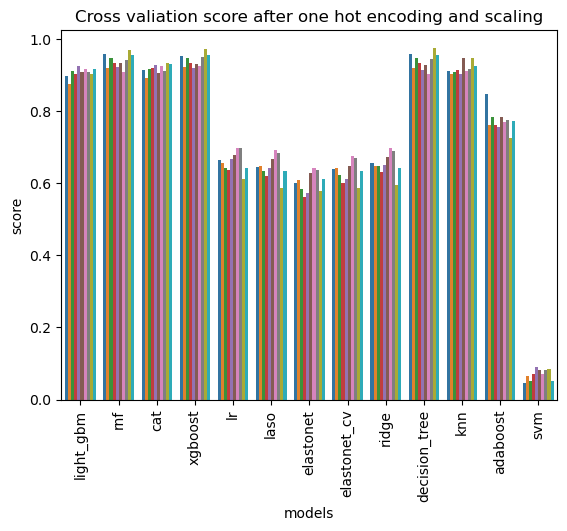

In [98]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('Cross valiation score after one hot encoding and scaling')

# With OHE without scaling

In [100]:
cv_score_with_OHE_no_scalling = pd.read_csv("with OHE without scaling.csv")

In [101]:
cv_score_with_OHE_no_scalling

,0,1,2,3,4,5,6,7,8,9,models
0,0.919066,0.886177,0.913327,0.890234,0.889475,0.901032,0.904798,0.914289,0.905846,0.925708,light_gbm
1,0.957651,0.918816,0.946321,0.932773,0.923085,0.931990,0.911713,0.938737,0.966834,0.959163,rnf
2,0.912922,0.890487,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932883,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664159,0.654358,0.658897,0.639010,0.666394,0.677728,0.699425,0.699520,0.610314,0.641405,lr
5,0.641511,0.635636,0.624111,0.607236,0.640670,0.662957,0.683425,0.685797,0.590699,0.624799,laso
6,0.641517,0.635136,0.624062,0.606932,0.640355,0.662738,0.683334,0.685411,0.590745,0.624627,elastonet
7,0.637052,0.633159,0.619754,0.603604,0.638622,0.663535,0.680702,0.683326,0.588795,0.619772,elastonet_cv
8,0.664253,0.654541,0.658716,0.638900,0.666370,0.677896,0.699621,0.699709,0.610523,0.641652,ridge
9,0.959082,0.919256,0.946789,0.934349,0.922111,0.928538,0.898382,0.946281,0.976222,0.956269,decision_tree


In [106]:
cv_score_with_OHE_no_scalling = cv_score_with_OHE_no_scalling.rename(columns={
    '0': 'CV_1',
    '1': 'CV_2',
    '2': 'CV_3',
    '3': 'CV_4',
    '4': 'CV_5',
    '5': 'CV_6',
    '6': 'CV_7',
    '7': 'CV_8',
    '8': 'CV_9',
    '9': 'CV_10',
})

In [108]:
cv_score_with_OHE_no_scalling.columns

Index(['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10', 'models'],
      dtype='object')

In [111]:
cv_score_with_OHE_no_scalling_melt = cv_score_with_OHE_no_scalling.melt(id_vars='models', 
                                                               value_vars= ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10']   )

In [112]:
cv_score_with_OHE_no_scalling_melt

,models,variable,value
0,light_gbm,CV_1,0.919066
1,rnf,CV_1,0.957651
2,cat,CV_1,0.912922
3,xgboost,CV_1,0.952070
4,lr,CV_1,0.664159
...,...,...,...
125,ridge,CV_10,0.641652
126,decision_tree,CV_10,0.956269
127,knn,CV_10,0.923695
128,adaboost,CV_10,0.804375


Text(0.5, 1.0, 'Cross valiation score after one hot encoding without scaling')

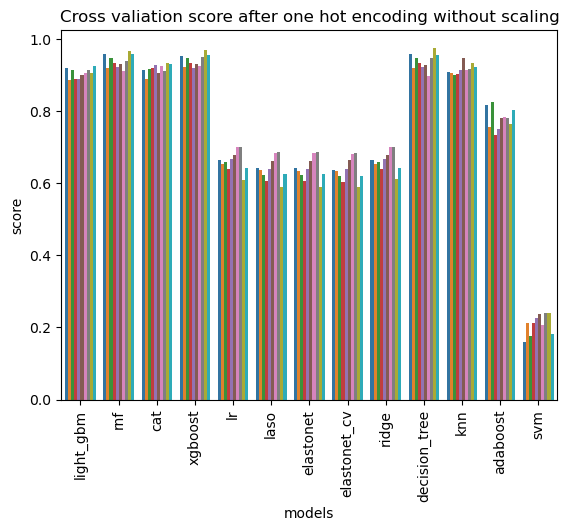

In [144]:
c = sns.barplot(x='models', y='value', hue = 'variable', data=cv_score_with_OHE_no_scalling_melt )
c.set_xticklabels(c.get_xticklabels(), rotation=90);
c.set_ylabel('score')
c.legend_.remove()
c.set_title('Cross valiation score after one hot encoding without scaling')

# CV score with only warp count OHE

In [119]:
cv_OHE_only_warp_cout= pd.read_csv('CV-score-with-OHE only one categorical colum-warp count.csv')

In [128]:
cv_OHE_only_warp_cout.drop('Mean', axis=1, inplace= True)

In [139]:
cv_OHE_only_warp_cout= cv_OHE_only_warp_cout.drop(13, axis=0)

In [140]:
cv_OHE_only_warp_cout_melt = cv_OHE_only_warp_cout.melt(id_vars='models', 
                                value_vars= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']   )

In [149]:
cv_OHE_only_warp_cout_melt[['variable','value']] = cv_OHE_only_warp_cout_melt[['variable','value']].astype(float)

Text(0.5, 1.0, 'CV-score-with-OHE only one categorical colum')

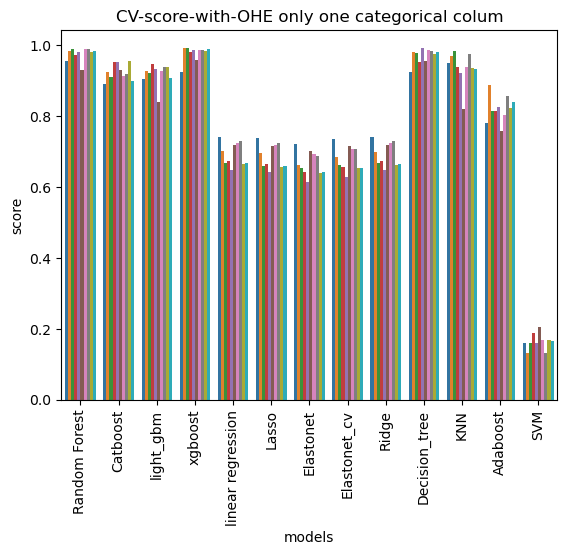

In [153]:
d = sns.barplot(x='models', y='value', hue = 'variable', data=cv_OHE_only_warp_cout_melt, errorbar=None )
d.set_xticklabels(d.get_xticklabels(), rotation=90);
d.set_ylabel('score')
d.legend_.remove()
d.set_title('CV-score-with-OHE only one categorical colum')

# visualization

In [1]:
import pandas as pd

In [77]:
d = pd.read_csv('CV-all-okay---.csv')

In [78]:
with_out_scaling = d.iloc[0:12, :]

In [79]:
with_scaling = d.iloc[14:, :]

In [80]:
d2 = pd.concat([with_scaling, with_out_scaling], keys=['scaled', 'with out scaled'])

In [81]:
d2.models

scaled           14        Random Forest
                 15             Catboost
                 16            light_gbm
                 17              xgboost
                 18    linear regression
                 19                Lasso
                 20            Elastonet
                 21         Elastonet_cv
                 22                Ridge
                 23        Decision_tree
                 24                  KNN
                 25             Adaboost
                 26                  SVM
with out scaled  0         Random Forest
                 1              Catboost
                 2             light_gbm
                 3               xgboost
                 4     linear regression
                 5                 Lasso
                 6             Elastonet
                 7          Elastonet_cv
                 8                 Ridge
                 9         Decision_tree
                 10                  KNN
                

In [82]:
d3 = d2.reset_index()

In [83]:
d3['level_1'] = d3.models

In [84]:
d4= d3.drop('models', axis=1)

In [85]:
d4['index'] = d3['level_0'] +'_'+ d3['level_1']
# d4

In [86]:
import seaborn as sns

In [88]:
d5= d4.melt(id_vars='index', value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], )

In [100]:
d4= d4.rename(columns={'level_0': 'Scaling', 'level_1': 'Algorithms'})

In [101]:
d4.head()

,Scaling,Algorithms,0,1,2,3,4,5,6,7,8,9,Mean,index
0,scaled,Random Forest,0.956097194,0.984867,0.989701,0.970520,0.979354,0.931479,0.989040,0.991334,0.983029,0.984728,0.976015,scaled_Random Forest
1,scaled,Catboost,0.892214094,0.924444,0.910316,0.951999,0.953047,0.930616,0.914382,0.919393,0.955160,0.898209,0.924978,scaled_Catboost
2,scaled,light_gbm,0.897425726,0.922892,0.919599,0.954547,0.939939,0.866795,0.926926,0.931476,0.945380,0.893284,0.919826,scaled_light_gbm
3,scaled,xgboost,0.924373225,0.993285,0.992800,0.981458,0.987239,0.958999,0.987755,0.986792,0.982967,0.989911,0.978558,scaled_xgboost
4,scaled,linear regression,0.742418546,0.700871,0.667498,0.673742,0.648562,0.719458,0.724211,0.731188,0.664248,0.666962,0.693916,scaled_linear regression


In [102]:
d6 = d4.melt(id_vars=['Scaling', 'Algorithms'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
d6['value']= d6['value'].astype(float)

In [90]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'score')

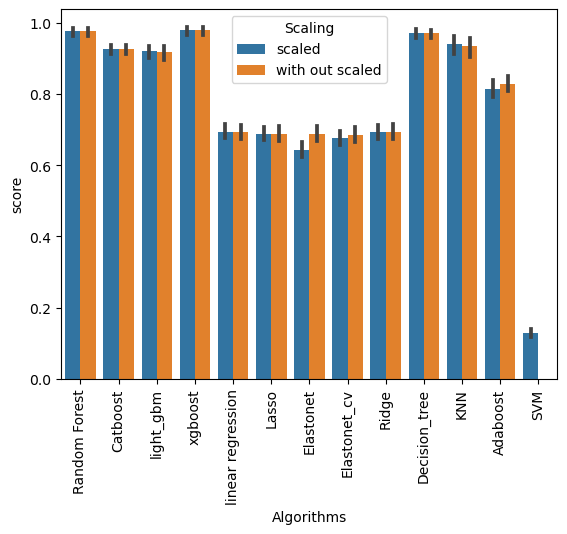

In [106]:
a = sns.barplot(x='Algorithms', y = 'value', data=d6, hue = 'Scaling' )
a.set_xticklabels(a.get_xticklabels(), rotation=90);
a.set_ylabel('score')